# Advanced Machine Learning SS 2024
##  Portfolio for the Final Grade

Welcome to the final portfolio of the Advance Machine Learning Course 2024. Please read the following instructions carefully.

<div class="alert alert-block alert-info">

* In this Jupyter Notebook, you find **12 exercises**. Each exercise is about one of the lectures your heard this semester.

* The portfolio should be solved as a **group of three** that was registered in Stud.IP. Deadline for handing the portfolio in is the **17th of July 2024 23:59 CET (German time)**.

* Do **not** add, delete, or rearrange cells. Also, only modify those cells which say to insert an answer or code (double click on the cell that says "Insert your answer here")

* If you did not participate in the tutorials and want to run the code segments in the portofolio, follow the installation instructions you find on stud.ip under files -> Tutorial Monday -> Installation Guideline

* If you include code that is intended to be run to generate a solution, make sure that we can run your code without any modifications to the submitted notebook (i.e., no missing imports, top-to-bottom execution of cells, no absolute paths, etc.)

* The exercise 12, reflection of AI tools is **mandatory** for the portfolio.

* Please fill out the individual contribution statement at the end
</div>

*Good luck!*

##### **Please enter the names and student ID numbers of all group members here:**



### **DISCLAMER: If some of the images doesn't show up check the portfolio_images/ folder. That's the place where we store our images.**

### Excercise 1: NN Basics

Consider the following Neural Network given with a input, hidden and output layer and loss function as Binary Cross entropy. The hidden layer uses ReLU and output layer uses sigmoid as activation function. The output label can be either 1 or 0. For the calculations the input x and weights in hidden layer and output layer are given and the label for the corresponding input is 0. <br>

![alternative text](portfolio_images/NN_diagram_1.png) <br>
$input, x = \begin{bmatrix}x_{1} \\x_{2} \end{bmatrix} =\begin{bmatrix}-1 \\2 \end{bmatrix}$ and label, y = 0<br>
$W^{T}_{hidden} = \begin{bmatrix} w_{11}&w_{21}\\w_{12}&w_{22}\end{bmatrix}= \begin{bmatrix} 0.2&0.1\\-0.1&0.2\end{bmatrix} $ <br>
a = $W^{T}_{hidden}x$ <br>
output of the hidden layer, $h = ReLU(a)$ <br>
$W^{T}_{out} = \begin{bmatrix}0.1 & 0.2 \end{bmatrix} $ <br>
$a_{out}$ = $W^{T}_{out}h$ <br>
output of the output layer, $y' = \sigma (a_{out})$ <br>

Show that gradient descent with back-propagation reduces the Binary Cross Entropy loss using the following steps: <br>

a) Compute the current loss $L_{(1)}$ using forward propagation. (2 points) <br>


**Hidden layer**

*Input*

a = $W^{T}_{hidden}x$ <br />
a = $\begin{bmatrix} 0.2&0.1\\-0.1&0.2\end{bmatrix} \cdot \begin{bmatrix}-1 \\2 \end{bmatrix}$<br />
a = $\begin{bmatrix} 0.2 \cdot -1 + 0.1 \cdot 2\\-0.1 \cdot -1 + 0.2 \cdot 2\end{bmatrix}$<br />
a = $\begin{bmatrix} 0.0 \\ 0.5 \end{bmatrix}$<br />

*Output*

$h = \text{ReLU}(a)$ <br>
$h = \begin{bmatrix} \max(0.0, 0) \\ \max(0.5, 0) \end{bmatrix}$<br />
$h = \begin{bmatrix} 0.0 \\ 0.5 \end{bmatrix}$

--

**Output Layer**

*Input*

$a_{out} = W_{out}^T h$<br />
$a_{out} = \begin{bmatrix} 0.1 & 0.2 \end{bmatrix} \cdot \begin{bmatrix} 0.0 \\ 0.5 \end{bmatrix}$<br />
$a_{out} = 0.1 \cdot 0.0 + 0.2 \cdot 0.5$<br />
$a_{out} = 0.1$

*Output*

$y' = \sigma(a_{out})$<br />
$y' = \sigma(0.1)$<br />
$y' = \frac{1}{1 + e^{-0.1}}$<br />
$y' \approx 0.525$

--

**Loss**

$L_{(1)} = -(y \cdot \log(y') + (1 - y) \cdot \log(1 - y'))$ <br>
$L_{(1)} = -(0 \cdot \log(0.525) + (1 - 0) \cdot \log(1 - 0.525))$ <br>
$L_{(1)} = -(0 - 0.744)$ <br>
$L_{(1)} = 0.744$

b) Compute the gradients of all weights using Back-propagation and apply Gradient descent with a learning rate of 0.1 to update the weights. (3 points) <br>


**Base derivatives**

$\frac{\partial L}{\partial y'} = \frac{y' - y}{y' \cdot (1 - y')}$<br />
$\frac{\partial L}{\partial y'} = \frac{0.525 - 0}{0.525 \cdot (1 - 0.525)}$<br />
$\frac{\partial L}{\partial y'} = \frac{0.525}{0.525 \cdot 0.475}$<br />
$\frac{\partial L}{\partial y'} = \frac{1}{0.475}$<br />
$\frac{\partial L}{\partial y'} = 2.105$

$\frac{\partial L}{\partial a_{out}} = \frac{\partial L}{\partial y'} \cdot \frac{\partial y'}{\partial a_{out}}$<br />
$\frac{\partial L}{\partial a_{out}} = 2.105 \cdot (y' \cdot (1 - y'))$<br />
$\frac{\partial L}{\partial a_{out}} = 2.105 \cdot (0.525 \cdot (1 - 0.525))$<br />
$ \frac{\partial L}{\partial a_{out}}= 2.105 \cdot (0.525 \cdot 0.475)$<br />
$\frac{\partial L}{\partial a_{out}} = 2.105 \cdot 0.249$<br />
$\frac{\partial L}{\partial a_{out}} = 0.524$

$\frac{\partial L}{\partial h} = \frac{\partial L}{\partial a_{out}} \cdot \frac{\partial a_{out}}{\partial h}$<br />
$\frac{\partial L}{\partial h} = 0.524 \cdot W_{out}^T$<br />
$\frac{\partial L}{\partial h} = 0.524 \cdot \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix}$<br />
$\frac{\partial L}{\partial h} = \begin{bmatrix} 0.0524 \\ 0.1048 \end{bmatrix}$

$\frac{\partial L}{\partial a} = \frac{\partial L}{\partial h} \cdot \frac{\partial h}{\partial a}$<br />
$\frac{\partial L}{\partial a} = \begin{bmatrix} 0.0524 \\ 0.1048 \end{bmatrix} \cdot \begin{bmatrix} 0 \\ 1 \end{bmatrix}$<br />
$\frac{\partial L}{\partial a} = \begin{bmatrix} 0 \\ 0.1048 \end{bmatrix}$

$\frac{\partial h}{\partial a} = \begin{cases} 1 & \text{if } a > 0 \\ 0 & \text{if } a \leq 0 \end{cases}$<br />
$ a = \begin{bmatrix} 0 \\ 0.5 \end{bmatrix} \rightarrow \frac{\partial h}{\partial a} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$


**Derivatives for the weights**

$\frac{\partial L}{\partial W^{T}_{out}} = \frac{\partial L}{\partial a_{out}} \cdot \frac{\partial a_{out}}{\partial W^{T}_{out}}$<br />
$\frac{\partial L}{\partial W^{T}_{out}} = 0.524 \cdot h$<br />
$\frac{\partial L}{\partial W^{T}_{out}} = 0.524 \cdot \begin{bmatrix} 0.0 \\ 0.5 \end{bmatrix}$<br />
$\frac{\partial L}{\partial W^{T}_{out}} = \begin{bmatrix} 0.0 \\ 0.262 \end{bmatrix}$

$\frac{\partial L}{\partial W^{T}_{hidden}} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial W^{T}_{hidden}}$<br />
$\frac{\partial L}{\partial W^{T}_{hidden}} = \begin{bmatrix} 0 \cdot (-1) & 0 \cdot 2 \\ 0.1048 \cdot (-1) & 0.1048 \cdot 2 \end{bmatrix}$<br />
$\frac{\partial L}{\partial W^{T}_{hidden}} = \begin{bmatrix} 0 & 0 \\ -0.1048 & 0.2096 \end{bmatrix}$

**Update weights**

$W^{T}_{out} = W^{T}_{out} - \alpha \cdot \frac{\partial L}{\partial W^{T}_{out}}$<br />
$W^{T}_{out} = \begin{bmatrix} 0.1 & 0.2 \end{bmatrix} - 0.1 \cdot \begin{bmatrix} 0.0 \\ 0.262 \end{bmatrix}$<br />
$W^{T}_{out} = \begin{bmatrix} 0.1 & 0.2 \end{bmatrix} - \begin{bmatrix} 0.0 \\ 0.0262 \end{bmatrix}$<br />
$W^{T}_{out} = \begin{bmatrix} 0.1 & 0.1738 \end{bmatrix}$

$W^{T}_{hidden} = W^{T}_{hidden} - \alpha \cdot \frac{\partial L}{\partial W^{T}_{hidden}}$<br />
$W^{T}_{hidden} = \begin{bmatrix} 0.2 & 0.1 \\ -0.1 & 0.2 \end{bmatrix} - 0.1 \cdot \begin{bmatrix} 0 & 0 \\ -0.1048 & 0.2096 \end{bmatrix}$<br />
$W^{T}_{hidden} = \begin{bmatrix} 0.2 & 0.1 \\ -0.1 & 0.2 \end{bmatrix} - \begin{bmatrix} 0 & 0 \\ -0.01048 & 0.02096 \end{bmatrix}$<br />
$W^{T}_{hidden} = \begin{bmatrix} 0.2 & 0.1 \\ -0.08952 & 0.17904 \end{bmatrix}$

c) Perform Forward-propagation again with the updated weights and recompute the loss $L_{(2)}$ (2 points)

**Hidden Layer**

*Input*

$a = W_{hidden}^T \cdot x$ <br>
$a = \begin{bmatrix} 0.2 & 0.1 \\ -0.08952 & 0.17904 \end{bmatrix} \cdot \begin{bmatrix} -1 \\ 2 \end{bmatrix}$ <br>
$a = \begin{bmatrix} 0.2 \cdot (-1) + 0.1 \cdot 2 \\ (-0.08952) \cdot (-1) + 0.17904 \cdot 2 \end{bmatrix}$ <br>
$a = \begin{bmatrix} 0.0 \\ 0.4476 \end{bmatrix}$ <br>

*Output*

$h = \text{ReLU}(a)$ <br>
$h = \begin{bmatrix} \max(0.0, 0) \\ \max(0.4476, 0) \end{bmatrix}$ <br>
$h = \begin{bmatrix} 0.0 \\ 0.4476\end{bmatrix}$

--

**Output Layer**

*Input*

$a_{out} = W_{out}^T \cdot h$ <br>
$a_{out} = \begin{bmatrix} 0.1 & 0.1738 \end{bmatrix} \cdot \begin{bmatrix} 0.0 \\ 0.4476 \end{bmatrix}$ <br>
$a_{out} = 0.1 \cdot 0.0 + 0.1738 \cdot 0.4476$ <br>
$a_{out} \approx 0.0778$

*Output*

$y' = \sigma(a_{out})$ <br>
$y' = \sigma(0.0778)$ <br>
$y' = \frac{1}{1 + e^{-0.0778}}$ <br>
$y' \approx 0.5194$

--

**Loss**

$L_{(2)} = -(y \cdot \log(y') + (1 - y) \cdot \log(1 - y'))$ <br>
$L_{(2)} = -(0 \cdot \log(0.5194) + (1 - 0) \cdot \log(1 - 0.5194))$ <br>
$L_{(2)} = -(0 - 0.7327)$ <br>
$L_{(2)} = 0.7327$

### Exercise 2: Regularization and Optimization

#### a) Questions

| Model | 1. | 2. | 3. | 4. |
| --- | --- | --- | --- | --- |
| Train Error | 0.39 | 0.25 | 0.5 | 0.15 |
| Test Error | 0.4 | 0.3 | 0.5 | 0.6 |

Let's say, you're training a neural network to classify male and female avatar faces. Your dataset is difficult: a person manages to achieve only a 85% accuracy on it. At different stages during the development of your model you achieve the following four train, test error tuples.

**1. Explain why you would look at the train and test error, what the difference between them is, and how they relate to the error of the model. (maximum 5 sentences):** (1 points)

The train and test error indicates if the model "understands the data" and generalizes for the given task. The train error indicates how well the model performs on the training data, so on which the model wights get adjusted. On the other hand with the test data the model performance on unseen data is tested, so how well the model generalized from the training data and performs the task. Indicated with the test error. The aim is to get a low error rate at the train and test error, which implies a low model error, so than the model understood the concepts of the data and is able to perform well on the task.

<!-- # TODO **how they relate to the error of the model? NEED TO TALK** -->

**2. Match the model performance and Bias/Variance situations to each dartboard hit illustration in the figure below and give a short explanation (1 sentence) to each combination. Also match each illustration with a model from the table above.** (2 points)

*Example solution:*
* A - *Bias/Variance: a, Model performance: a, Model: 1*
* B - *Bias/Variance: b, Model performance: b, Model: 2*

Bias/Variance: **a.** high variance + high bias, **b.** high variance, **c.** high bias, **d.** low bias + low variance <br>
Model performance: **a.** best model, **b.** worst model, **c.** overfitting, **d.** underfitting

![Figure 1](portfolio_images/dartboard_illustration_Q2.jpg)

**(A)**

Bias/Variance: d, Model performance: a, Model: None (Maybe 2, but it isn't really a good result in my opinion) : Best model, learned the general concepts of the training data and "transfers it to unseen data", so is able to perform well on unseen data. The predictions are close to each other (low variance) and one the desired spot as intented (low bias).

Bias/Variance: b, Model performance: c, Model: 4 : Overfitting, learned the (specific) training data features and not the general concepts. Assuming we see the test data predictions.

**(B)**

Bias/Variance: b, Model performance: c, Model: 4 : Overfitting, the predictions are centered around the right spot but have a high variance.

**(C)**

Bias/Variance: a, Model performance: b, Model: 3 : Worst model, the model wasn't able to get the concepts of the (training) data at all. The data isn't close to each other and even far away from the desired spot. Some reasons: (1) less samples (2) less weights/parameter to train.

**(D)**

Bias/Variance: c, Model performance: d, Model: 1/2 : Underfitting, the model wasn't able to fully grasp the essence of the training data. The predictions are packed but have a high bias to the center. Fix: give the model more room to learn the concepts by training longer or increase the weights of the model


**3. Why is Regularization important in machine learning and how does the L2 regularization affect the model training process? Give another example of a regularization method!** (1 point)

Regularization helps regulating the influence of weights in the model by keeping them small. With that technique we prevent the model to overfit and generalize better. So predictions rely on certian weights less and this keeps the weights more even/in balance.

The L2 regularization adds up in the weight updates process by driving the weight values towards zero. The weight values can get very close to zero but not exact zero, in this case.

A other regularization method is the L1 regularization, which basicly does the same as the L2 regularization, however allows weights to become zero. That can lead to a performance benefit over L2 regularization because many low float multiplication can cost expansive computing power, which L1 is cutting of by letting weights become zero.   

<!-- OPtimizer: ;adam -  -->

**4. Is overfitting an issue for massive-scale models, like large-language models? What evidence for or against overfitting do you see?** (1 point)

Yes, it is. There isn't a reliable systematic way to match the amount of data to number of weights and layers for a model, so it's capable of handling a wished task and does not overfit. The training and test errors are good indicators but not more. The massive scale of the model makes it inappropriate to check for overfitting responses systematicly. The huge data corpus makes it more likely that data gets redundant which lifts overfitting as well. Moreover the model gets trained over many iterations and it might only be able to get fewer (marginal) improvments by "learning" the concrete training data, espacially in the later iterations, because it had seen the data so often already.

A obvious sign for overfitting is a rising evaluation loss while the training loss decreases or the losses almost stagnates it might be good to stop the training because the last point f the first paragraph come in play.

<!-- We aren't able right now to calculate the point a model is overfitting -->

<!-- -- -->

<!-- Viele iterationen um maginale Verbeseungen noch zu errechen dabei lernt/füllt erreicht das model es nur indem es Daten "auswendig lernt"

Das model "unmöglich" systematisch zu prüfen auf overfitting

Daten häufig gesehen oder sehr ähnlich Daten wenn ein großer Corpus an Daten daher zwangsweise

complexität des Problems

--

chatBot Data leaks via chatting

loss stagniert, maginale gewinne

loss steigt

Diskrepanz zwischen train und evalation loss -->

#### b) Implementation
Use the following code cell to:

**1. Implement your own binary Cross-Entropy loss function.**  (2 points)

**2. Add L2 regularization using the L2 regularized *binary* objective function.** (2 points)

Notes:
* Do not change existing code, only add your code. Follow the hints in the comments.
* Implement BINARY cross-entropy loss. There will be NO points for implementing categorical CE!
* Do NOT use loops when implementing the loss function (no "for", "while")! We will deduct points if loops are used!

In [ ]:
class MyCrossEntropyLoss(nn.Module):

    def __init__(self, params, l2=0):
        super().__init__()
        self.l2 = l2
        self.para = params

    def forward(self, y_predicted, y_target):
        y_predicted = F.sigmoid(y_predicted)

        ### start; your code here
        # cross-entropy term
        # take log of predicted output probabilities of your samples and then multiply with target vectors
        # for stability: add a small epsilon before taking log to avoid nan values when taking log of 0
        eps = 1e-8


        # loss function
        ## BCE = -(y*log(p) + (1-y)*log(1-p)) y-label/curr class; p-prediction
        loss_p1 = torch.log(y_predicted + eps)
        loss_p2 = torch.log((1-y_predicted) + eps)
        mod_label = (1-y_target)
        loss_merge = torch.add((torch.mul(y_target, loss_p1)), (torch.mul(mod_label, loss_p2)))

        # sum CE loss over all samples
        loss_sum = torch.sum(loss_merge)

        # take average of the CE sum to get avg loss per sample
        loss_avg = loss_sum / y_predicted.size(0)

        # negate the result
        loss = - loss_avg
        ### end of your code;

        # using L2 regularization
        if self.l2 > 0:
            # loop over all parameters (weight matrices and bias vectors)
            for p in self.para:
                # p.data contains the current parameter values. In the used network all weights are matrices, so
                # we filter biases based on that fact
                if len(p.data.size()) == 1:
                    # skip bias vectors
                    continue

                ### start; your code here
                # loss term for L2 regularization
                # calculate L2 term (squared L2 norm of weight matrix)
                l2_term = torch.sum(torch.square(p.data))
                # calculate weight of L2 term using self.l2
                l2_weight = self.l2 / (2 * y_predicted.size(0)) # self.l2 / 2
                # multiple weight and term and add to CE loss
                loss = torch.add(loss, torch.mul(l2_term, l2_weight))
                ### end of your code;


        return loss

**3. What does the ```y_predicted = F.sigmoid(y_predicted)``` do and what is the benefit of it ?** (1 point)

The sigmoid function is used to bring numbers/values in the range between zero and one, so it's kind of "normalizing" the predictions. The benefit is predictions can be interpreted way easier to which class they most likely belong to. A predicted value closer to one means the model finds the input belongs to the certain class.


<!-- So as more likly the model "thinks" an input belongs to a certain class the value gets closer to one -->

<!-- It applies the sigmoid function on the predictions, which holds the benefit of "normalizing" the values of it to fit the pytorch implementation and especially reduces extrem values. So the values of the predictions are more even. -->

<!-- "Normalisieren" die Prediction, Extremwerte eingrenzen in Werteradium. Angleichen an label Skalar -->

### Exercise 3 : End-to-End Systems

**1. Explain what an End-to-End Deep Learning System is by discussing an example in the context of Machine Translation** (2 points)

A End-to-End Deep Learning System in general is a deep neural network which is trained from input to output as one "block" to solve a complex problem by backpropagating the error from back to front in the entire system. Before the era of End-to-End Systems a Machine Translation System consisted of multiple modules which where "trained" seperately solving diverent problems and where then sequentially combined as a pipeline to solve the translation problem. As a End-to-End System the model takes a input sentence and gives the corresponding output sentence in the desired language, e.g Encoder-Decoder (attention) model. No need for specific algorithm tagging specific tasks like parsing.

**2. The Amarican superhero Daredevil who is blind wants to question the only suspect regarding the investigation he is conducting. However, the suspect is deaf and only communicates in Italian Sign Language. He hires you and asks you to build a system that will enable him to interrogate this suspect.** (4 points)

i) How would your system look like that is solving this task? Give a rough outline of both: an End-to-End system as well as a modular system (input/output and involved processes/modules (rough) for each system).

ii) What are the advantages/disadvantages of each of your systems (End2End vs modular) you described in i)?

Grading conditions / important notes:

For (i): Make sure to identify all sub-problems your system needs to tackle in order to appropriately solve the described task.

> i)

**End2End**

<!-- Input: Speech as spectrogram (encoder) + italina sign language as image-sequence compressed to one image (decoder)
Architecture: attention-based Encoder-Decoder model -->
<!-- Output: Multi-head (1) text in Italian language (2) text in english (via text-to-speech) -->

System 1

Input: Daredevil's question as audio
Process:
  - Convert audio to text (Speech-to-Text)
  - attention-based encoder-decoder model
    - Encoder given english sentences for training
    - Decoder given a sequence of italian sign images for training
      - CNN: Extract the features of the images beforehand and encode them as vectors
  - Diffusion component as a output head of the Decoder, to reconstruct the vector embedding back to images of Italian Sign Language

Output: Image sequence of Italian Sign Language

System 2

Input: Suspect video of Italian Sign Language
Process:
  - LSTM-CNN: Take the frames of the video and extract the features from the frames and represent/encode them as vectors
  - The vectors get packed as a sequence and than fed into the encoder
  - Encoder given encoded images as vectors for training
  - Decoder given english sentences for training
Architecture:
  - Encoder
    - LSTM-CNN component
    - Classical attention encoder
  - Decoder
    - Classical attention decoder

Output: Text in english (Outputed as Text-to-Speech)

**Modular**

System 1

Input: Daredevil's question as audio
Process:
  - Preprocess the audio, filter noise
  - Converts the audio to a more suitable format like spectrogram
  - Converts the data to english text, using for example the automatic speech recognition pipeline mentioned in the lecture
    - Check ambiguous parts by hand/experts
  - Translate the text into italian language by taking parts and looking it's translation up at a dictionary/language model
    - Check/Translate or rephrase ambiguous parts by hand/experts
  - Word embedding: Convert the text into tokens
  - Diffusion model: Based on the tokens as input generate a sequence of Italian Sign Language images

Output: Image sequence of Italian Sign Language

System 2

Input: Suspect video of Italian Sign Language
Process:
  - Preprocess the video, preselect parts
  - CNN-RNN model: 
    - CNN: Extract features from the frames and encode them into vectors
    - RNN: "Reconstruct"/"Classify"/Predict the Italian words
  - Translate the text into english language by taking the words and looking it's translation up at a dictionary/language model
  - TTS: Give the text a Text-to-Speech model which generates the corresponding audio data

Output: Text in english (Ouputed as Text-to-Speech)

> ii)

**End-to-End**

Advantages
<!-- - Can be constantly retrained, so be always up-to-date in terms of slang words -->
- Easier to retrain, because you need only to train one module
- Can simulate your voice as output, so the system is more personal
- The system is more compact
- One system means it can learn to solve the entire task more deeply as once

Disadvantages
- Missing transperancy in terms of unterstanding what the model exactly does
- Overall consums (more) resources (espcially the training)
- More/A lot of training data is need in order to work properly
- Adjusting the model brings the need of retraining the whole model
<!--- The complexity of such a model makes it more difficult to design it -->

**Modular**

<!-- It's more a abstract model/approch, tries to model/recreate the syntax/structure od language -->

Advantages
- It's (more) understandable, the function of each component is clear
- It's easier to swap components/adress problems
- Less resources are needed

Disadvantage
- Expert knowleadge is needed for designing and testing the each component of the system
- It is leaking flexibilty in terms of slang words
  - Need to be asjusted/checked by hand
- The interfaces between the components can be a bottleneck
  - Need to be designed and adjusted by hand

**3. Autonomus Driving system can also be introduced as an end-to-end system. Explain main components of an Autonomus Driving system, and how each components are connected and contribute to the the overall system.** (2 points)

Notes: Use "[Standard Driven Software Architecture for Fully Autonomous Vehicles](https://www.atlantis-press.com/journals/jase/125934832/view)" by Serban et al. to support your explanations.

The Autonomous Driving System is based on the semantic Real Time Control Systems hierachy, short RCS. "Components lower in the hierarchy handle less complex tasks"[[1]](https://www.atlantis-press.com/journals/jase/125934832/view), while higher components handle complex tasks like planning by taking many outcomes from lower nodes into consideration. On the low level sensors surf two tasks, represent and monitor the vehicles internal state and monitor the environmnet using sensors like LIDAR, cameras etc. They are kept separated by functionality. Sensor fusion combines the data of the different sensors in order to better represent the environment. The world model component one level higher takes the outcome from the sensor fusion component and stored data like maps or historical data from previous processes to model the world in higher detail. A even higher level of abstraction is the behaviour component predicting the environment and the vehicles behaviour. Based on the vehicle's goal it builds "multiple behaviour options and selects the best one"[[1]](https://www.atlantis-press.com/journals/jase/125934832/view). Then the planning component takes the chosen behaviour and generates a trajectory the vehicle should follow. Requirements are the trajectory need to be obstacle free and satisfy the chosen behaviour. The vehicle control component function is to translate the trajectory into lateral and longitudinal controls, in order to guide the vehicle along the planned trajectory, where longitudinal decides which action to take next and lateral computes the target steering angle. The actuator interface acts as a interface between the vehicles control and mechanics, translating the data to actuator commands. The data management component is vertically integrated in the system holding the databases for all kinds of components, managing the data pipelines. The system and safety management component is vertically integrated as well, it overrides the vehicle control if it detects a clash with the safty policy.

[[1]](https://www.atlantis-press.com/journals/jase/125934832/view) "Standard Driven Software Architecture for Fully Autonomous Vehicles" by Serban et al., last accessed 17.07.2024

<!-- # **TODO** TODO TODO TODO 13 Seiten -->

### Exercise 4: RNN/LSTM

In [1]:
import os
import cv2
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from skimage import io
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())


batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

input_dim = 28
hidden_dim = 64 # for example

output_dim = 10
layer_dim = 1


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16053129.54it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 508926.46it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4504460.17it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4628408.35it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [2]:
# The RNN
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.layer_dim = layer_dim
        # Building your RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='tanh')

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        if torch.cuda.is_available():
            h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda()
        else:
            h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)

        #Define the forward steps

        out, hn = self.rnn(x, h0.detach())
        out = self.fc(out[:, -1, :])

        return out

a) From the above lines of code in RNN model (Try to answer short and precisely)

1. Is there line(s) of code to prevent exploding or vanishing gradients, (1 point) <br>


Yes, it is see code `out, hn = self.rnn(x, h0.detach())`

<!-- No, there is not. -->

2. if yes, identify the line(s) and explain how it prevents exploding or vanishing gradients <br>
3. if no, add line(s) of code for the prevention and explain how<br>(Answer either 2 or 3) (3 points) <br>


2.

For a RNN model the previous hidden state influences the current state, which over time can lead to exploding or vanishing gradients, because of the models sequential architecture/processing. By detaching the hidden state it gets independent from the current graph and doesn't require gradient, as a result the "endless" propagating of the value stopped which preventing the gradient to explode or vanish, see [torch doc](https://pytorch.org/docs/stable/generated/torch.Tensor.detach.html#torch.Tensor.detach) for more information.

<!-- 3.

We added dropout to the constructor of the RNN. Dropout basicly picks a amount of neurons per layer at training which will then not fire at all. The picked neurons change over epoch. In the concrete example above 40% of the neurons per layer (except the last layer) get dropt out (see [pytorch doc](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html) for more details). -->

<!--
Ideen
- Regularization wie dropout hinzufügen
- Aktivierungsfunktion zu einer approximierten mit harten Grenzen ändern (logtanh?)
- Optimierer wie Adam anwenden auf gradient
- Regularization wie L2 hinzufügen -->

4. Describe one another method to prevent exploding or vanishing gradient. (1 point)

As mentioned in the lecture one method is gradient clipping, by appling a threshold to the gradient it can't get bigger than the threshold. So the gradient can't explode.

<!-- https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks#architecture quelle aus lecture -->
<!-- lecture RNN page 36 -->

<!-- Ideen
- Aktivierungsfunktion zu einer approximierten mit harten Grenzen ändern (logtanh?)
- Optimierer wie Adam anwenden auf gradient
- Regularization wie L2 hinzufügen -->

b) Implement a Bidirectional GRU model with dropout of 0.1 in the following code (4 points) <br>


In [3]:
# b) Implementation of Bi-GRU: complete TODOs
class GRUModel(nn.Module): # class TextClassifierGRU
  def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):  # vocabulary size:vocab_size, dimensions of the embedding:dim_embed, number of classes:num_classes, number of layers:num_lay,hidden dimension:dim_hidden
    super(GRUModel,self).__init__()
    self.bidir = True
    # TODO: Hidden dimensions
    self.hidden_dim = hidden_dim

    # TODO: Number of hidden layers
    self.layer_dim = layer_dim

    # TODO: Building your Bi-GRU
    self.gru = nn.GRU(input_dim, hidden_dim, layer_dim, batch_first=True, dropout=0.1, bidirectional=self.bidir)

    #TODO: linear forward layer
    self.fc = nn.Linear(hidden_dim*2, output_dim) if self.bidir else nn.Linear(hidden_dim, output_dim)

  def forward(self,x):
      # TODO: Initialize hidden state and cell state with zeros
      if torch.cuda.is_available():
        if self.bidir:
          h0 = torch.zeros(self.layer_dim*2, x.size(0), self.hidden_dim).cuda()
        else:
          h0 = torch.zeros(self.layer_dim*2, x.size(0), self.hidden_dim).cuda()
      else:
        if self.bidir:
          h0 = torch.zeros(self.layer_dim*2, x.size(0), self.hidden_dim)
        else:
          h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)


      # TODO: Define the forward steps
      out, hn = self.gru(x, h0)
      out = self.fc(out[:, -1, :])

      return out

c) Check the accuracies of the RNN and GRU, and List down two possible implementations to improve the classifier performance. (1 point)

In [4]:
model_rnn  = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)
model_gru = GRUModel(input_dim, hidden_dim, layer_dim, output_dim)
#Move to GPU if available
if torch.cuda.is_available():
    model_rnn.cuda()
    model_gru.cuda()

#Instantiate the Loss
criterion = nn.CrossEntropyLoss()

#Instantiate the Optimizer
learning_rate = 0.1
optimizer_rnn = torch.optim.SGD(model_rnn.parameters(), lr=learning_rate)
optimizer_gru = torch.optim.SGD(model_gru.parameters(), lr=learning_rate)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [5]:
# RNN Training
# Number of steps to unroll
seq_dim = 28

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, seq_dim, input_dim))
            labels = Variable(labels)

        # Clear gradients w.r.t. parameters
        optimizer_rnn.zero_grad()

        # Forward pass to get output/logits
        outputs = model_rnn(images)

        # Calculate Loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer_rnn.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, seq_dim, input_dim).cuda())
                else:
                    images = Variable(images.view(-1, seq_dim, input_dim))

                # Forward pass only to get logits/output
                outputs = model_rnn(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.7387440204620361. Accuracy: 73.0999984741211
Iteration: 1000. Loss: 1.9378939867019653. Accuracy: 57.130001068115234
Iteration: 1500. Loss: 0.47523704171180725. Accuracy: 84.0999984741211
Iteration: 2000. Loss: 0.5050497055053711. Accuracy: 88.16999816894531
Iteration: 2500. Loss: 0.41135841608047485. Accuracy: 89.83000183105469
Iteration: 3000. Loss: 0.23669111728668213. Accuracy: 91.55999755859375


In [ ]:
# GRU Training

# Number of steps to unroll
seq_dim = 28

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, seq_dim, input_dim))
            labels = Variable(labels)

        # Clear gradients w.r.t. parameters
        optimizer_gru.zero_grad()

        # Forward pass to get output/logits
        outputs = model_gru(images)

        # Calculate Loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer_gru.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, seq_dim, input_dim).cuda())
                else:
                    images = Variable(images.view(-1, seq_dim, input_dim))

                # Forward pass only to get logits/output
                outputs = model_gru(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.9810601472854614. Accuracy: 35.93000030517578
Iteration: 1000. Loss: 0.883033037185669. Accuracy: 73.75
Iteration: 1500. Loss: 0.3655080795288086. Accuracy: 89.2699966430664
Iteration: 2000. Loss: 0.19546538591384888. Accuracy: 93.16000366210938
Iteration: 2500. Loss: 0.18754026293754578. Accuracy: 95.13999938964844
Iteration: 3000. Loss: 0.09249097853899002. Accuracy: 95.93000030517578


In order to improve the accuracy we could exchange the optimizer to adam. Train the models for more epochs. Add (more) regularization like L2, to keep weights smooth. Testing out differnt configurations of hyperparameter, like changing the dropout or learning rate for example. It would be also applicable to test different architectures in form of changing the number of hidden layers.



### Exercise 5: Convolutional Neural Networks (CNN)

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.

Download the dataset to your hard disk and extract the files. The data is provided as train-test split and the labels of the respective images are given by the name of the parent folder. Download the CIFAR10 dataset from  https://www.kaggle.com/datasets/swaroopkml/cifar10-pngs-in-folders?resource=download or from https://owncloud.csl.uni-bremen.de/s/9mNnmeA7esyEpnC. The corresponding paper of the CIFAR10 dataset: *"Learning Multiple Layers of Features from Tiny Images", Alex Krizhevsky, 2009*.

Take the last 20 % of the images of each class and save them in a separate folder structure for validation, e.g.:  
*\user\data\cifar10\validate\airplane\4001.png  
\user\data\cifar10\validate\airplane\4002.png  
...  
\user\data\cifar10\validation\bird\4001.png  
...*  
This leads to the following datasplit for each class: 4,000/1,000/1,000 images for training/validation/testing respectively.


```Important:``` change the directory path in the following code cell. <br>

First, we will do our imports, load the data and define a custom dataset. **Read** the following code cell carefully, it is used to prepare the data for the exercise.

In [8]:
root_dir = r'C:/Users/Klaus/WorkNAS/Uni/6FSINF_MA/Tutorial/aml_portfolio2024/data/cifar10' ### Insert your path here!! We will change it back to our path for the corrections
tr_dir = os.path.join(root_dir, 'cifar10_split', 'train')
cv_dir = os.path.join(root_dir, 'cifar10_split', 'validate')
tt_dir = os.path.join(root_dir, 'cifar10_split', 'test')

# Create datalist from directory for each subset
tr_file_list = []
cv_file_list = []
tt_file_list = []

# Load the training data
for path, subdirs, files in os.walk(tr_dir):
    for name in files:
        file_dir = os.path.join(path, name)
        label = path.split('\\')[-1]
        tr_file_list.append(file_dir + ' ' + label)

with open(os.path.join(root_dir, 'tr_data_list.txt'), 'w') as file:
    for item in tr_file_list:
        file.write("%s\n" % item)

# Load the validation data
for path, subdirs, files in os.walk(cv_dir):
    for name in files:
        file_dir = os.path.join(path, name)
        label = path.split('\\')[-1]
        cv_file_list.append(file_dir + ' ' + label)

with open(os.path.join(root_dir, 'cv_data_list.txt'), 'w') as file:
    for item in cv_file_list:
        file.write("%s\n" % item)

# Load the test data
for path, subdirs, files in os.walk(tt_dir):
    for name in files:
        file_dir = os.path.join(path, name)
        label = path.split('\\')[-1]
        tt_file_list.append(file_dir + ' ' + label)

with open(os.path.join(root_dir, 'tt_data_list.txt'), 'w') as file:
    for item in tt_file_list:
        file.write("%s\n" % item)

#### Define custom dataset
class cifar10Dataset(Dataset):
    def __init__(self, data_list_path):
        self.data_list_path = data_list_path
        self.data_save_dirs = []            # Stores the save dirs for the images
        self.labels = []
        self.label_encoder = LabelEncoder() # Encodes strings to integers for classification
        self._init_data()

    def __len__(self):                      # Get total number of dataset samples
        return len(self.data_save_dirs)

    def __getitem__(self, idx):             # Return an item
        data = io.imread(self.data_save_dirs[idx]) # Load image from hard disk
        lab = self.labels[idx]              # Load class label
        data = data.reshape(3, 32, 32).astype('float32') # Change to channels first and cast to float32
        data = data/255.0                   # Normalize input
        #print(data.shape)
        #plt.imshow(cv2.cvtColor(data.reshape(32, 32, 3), cv2.COLOR_BGR2RGB))
        return data, lab

    def _init_data(self):                   # Initialize data
        with open(self.data_list_path, 'r') as file:
            data_list = file.readlines()    # Read file list

        for d in data_list:
            s, l = d.split(' ')             # Split into input and label
            self.data_save_dirs.append(s)
            self.labels.append(l.rstrip('\n'))

        # Encode string labels to integers
        self.label_encoder.fit(self.labels)
        self.labels = self.label_encoder.transform(self.labels)

#### a) Explaining the Model  (6 points)
In the code cell below, a convolutional neural network is defined. **Answer the following questions concerning this model.** Each question related to a specific line of code. These are marked in the code cell. Try to answer short and precisely.

In [ ]:
class myNetwork(nn.Module):
    def __init__(self):
        super(myNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 5)                                    #1
        self.conv2 = nn.Conv2d(8, 16, 5)
        self.max1 = nn.MaxPool2d(kernel_size=2, stride=2)                  #2
        self.max2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)                                       #3

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)                                                      #4
        x = self.max1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.max2(x)                                                   #5
        x = x.view(-1, 400)                                                #6
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

conv1.weight torch.Size([8, 3, 5, 5])
conv1.bias torch.Size([8])
conv2.weight torch.Size([16, 8, 5, 5])
conv2.bias torch.Size([16])
fc1.weight torch.Size([120, 400])
fc1.bias torch.Size([120])
fc2.weight torch.Size([84, 120])
fc2.bias torch.Size([84])
fc3.weight torch.Size([10, 84])
fc3.bias torch.Size([10])


i) For the first convolutional layer what is the kernel size and the number of kernels. How many trainable weights does this layer consist of? (1 point)

The kernel size is 5 (5x5) and it is exact one kernel per channel so 8 in total.

**trainable weights**

weights = (kernel size * number of input channels + bias) * number of output channels

weights = $(5^2*3+1)*8 = 608$

ii) In your own words: What is the purpose of the max pooling operation? (1 point)

The max pooling takes the strongest representativ/pixel/value for each kernel size on the image/sample. It's a type of compression. In the line of code given the kernel size of 2*2, out of four neighbors the one with the highest value gets taken as the representative for them. Stripe defines the kernel movement, how many steps it goes after taking the representativ. stripe equals kernel size (default) means each pixel is considered once in the pooling operation.

iii) We introduced the CIFAR-10 dataset before in the introduction of this exercise. What is the correct output size of the final linear layer and why? Add this number in the code cell by replacing ```??```. (1 point)

The correct output size is ten, because we have a classification problem and want decide for each sample to which of the *ten* classes it belongs to. So considering the input/sample how likly it is (how much evidence) that the sample is one of the classes. Representat as a probability over alle classes.

iv) What does this line of code do and why? (1 point)

ReLU max(0, input) is an activation function which takes the input and "fires" if the input is above zero. If so, it means the feature of the input has some importance for the model to solve the task.

v) Consider the output volume of the last convolutional layer. Before further processing from the dense layers, the output volume gets processed by a max pooling layer. Based on the output volume shape, what is the shape of the output volume after the max pool operation? (1 point)

The shape gets reduced in half, because the maxpooling kernel size is 2*2 which takes one representativ out of four neighbors. Talking in numbers the model input sample size is *(32x32x3)*, by reaching the output of the last conv layer the volume gets reduced to *(10x10x16)*, so the output shape of the second maxpooling is *(5x5x16)*.

*Note: (width x height x channel_size)*

padding = 0; stride = 1; bias = 1

conv_output_size = $\frac{input_{size}-kernel_{size}+2*padding}{stride}+bias$ <br />

**Conv1**

conv1_ouput_size = $\frac{32-5+2*0}{1}+1$ <br />
conv1_ouput_size = 28

output volume shape = (28x28x8)

**Maxpooling1**

ouput volume shape = (14x14x8)

**Conv2**

conv2_ouput_size = $\frac{14-5+2*0}{1}+1$ <br />
conv2_ouput_size = 10

output volume shape = (10x10x16)

**Maxpooling2**

ouput volume shape = (5x5x16)

*Note: [formula to calculate the conv2d output](https://stackoverflow.com/questions/53580088/calculate-the-output-size-in-convolution-layer)*

<!-- reach the output of the mentioned maxpooling it needs to run through two maxpooling layer which quarter their input. So the output shape is: (16, 8, 8)  -->

vi) What does this line of code do and why? (1 point)

The view function reshapes a given tensor, it creates a new tensor keeps the data but in a different shape. In this specific context it is used to flatten the each sample of the tensor, to fit into the fully connected layer. The paramter *-1* implice take the shape from the input tensor and *400* specific the output dimension to bring the samples in. So in the end each sample has the shape of 400.

#### b) Model Training (2 points)

Give a step by step description of the training loop for one batch in one epoch. Explicitly state at which point the model is modified. Do not use code and explain the necessity of each step. (Bullet points)

1. Forward step: Get the the probability distribution/prediction over all classes for each sample of the batch
2. Loss: Calculate the loss for each probability class distribution of the samples from the batch
3. Backpropagation: Calculating the gradients of the loss by propagating the error backwards through the model
4. Weight update: In this state the model is modified by updating the weights acording to the gradient. The gradient takes a step by the learning rate and the predictions and labels getting closer.
   1. The optimization for each model weight is calculated simutaneously to keep the weights in balance

#### c) Calculate Convolution (1 point)

Given the input A and the kernel K, calculate the two dimensional convolution result. Calculate the result only for fully overlapping positions (valid) between A and K (hence padding is not required). We define stride=1.

![](portfolio_images/Matrix_A.png) &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; ![](portfolio_images/Kernel_K.png)



**The two dimensional convolution result calculation**

ax = $2*2+4*0+1*4+0*3 = 8$ <br />
ay = $2*4+4*3+1*2+0*1 = 22$ <br />
az = $2*2+4*1+1*0+0*4 = 8$ <br />

bx = $2*0+4*1+1*3+0*0 = 7$ <br />
by = $2*3+4*0+1*1+0*3 = 7$ <br />
bz = $2*1+4*3+1*4+0*2 = 18$ <br />

cx = $2*1+4*1+1*0+*5 = 6$ <br />
cy = $2*0+4*5+1*3+0*3 = 23$ <br />
cz = $2*3+4*3+1*2+0*1 = 20$ <br />

**The two dimensional convolution result**

|| a  | b | c |
|---|---|---|---|
| x | 8 | 7 | 6 |
| y | 22 | 7 | 23 |
| z | 8 | 18 | 20 |


####  d) Receptive Field (2 points)

i) Explain the concept of the receptive field of CNNs and why this is an important consideration when designing the model architecture. (1 point)

The receptive field is the CNN models concept of "vision", it defines how much information/pixels are considered of an image by time. The size of the receptive field controls how much features the model is able to grasp and set in context, so in other words how much context is considered. A big field means the ability to detect more complex and bigger objects but it comes with the downside of increasing weights, so you need to provide enough training data. Smaller fields need less weights and data but might overlook some concepts because of it's restricted view.

<!-- models concept of vision, grasp information/features. The receptive field decides how much context is considered. Be careful of the receptive fields, more "vision"/context means bigger kernel sizes which means more parameter to train, so you need to provide enough training data. Chance to for the model to graps more knowledge and perform better.

So consider what is my task. How much training data I can provide. How much context is need for my task. Bigger kernel sizes on early layers where the sample has still a high resolution could increase th training time because the model need to do more calculations as well. -->

ii) Calculate the exact size of the receptive field of the myNetwork class defined above (ignoring fully connected layers). Explain the calculation and make clear what the result is. (1 point)

To calculate the size of the receptive field of **myNetwork** we need to go from the output to the input layer of the network, like backpropagation does. Conv layer with kernel size f*f increases the receptive field by f-1. Maxpooling with a kernel size of 2 doubles the receptive field.

### myNetwork receptive field

**"output layer"** <br />
receptive field: 1x1

**maxpooling2** <br />
receptive field: 2x2

**conv2** <br />
receptive field: 6x6

**maxpooling1** <br />
receptive field: 12x12

**conv1** <br />
receptive field: 16x16

The receptive field of **myNetwork** is **16x16**.

### Exercise 6: Generative Models

#### a) Variational Autoencoders

**1. Explain the principle of Maximum Likelihood (ML) for training Variational Autoencoders (VAEs) Why can we not optimize VAEs with the exact likelihood, but use an approximation instead ?**  (2 points)

Maximum likelihood gives our data a probability, from there we try to find model parameters which maximizes the likelihood of our data. Our VAE model has a encoder-decoder architecture and aims to reconstruct the data, so maximum likelihood is used to find the model parameters to be able best reconstruct the data. Optimize VAEs with the exact likelihood is intractable because to reconstruct a variation of a sample $x^{(i)}$ we can't consider/compute every possible latent vector $z^{(i)}$ of the latent space.

<!-- # TODO | NEED TO TALK

- [X] ML Prinzip
- [X] ML by VAEs training
- VAEs optimizing with approx ML, why not exact ML?
  - [X] warum nicht mit exact ML optimieren
  - [ ] Warum mit approx ML dennoch möglich -->

<!-- Optimize VAEs with the exact likelihood is intractable because we can't compute every sample $x^{(i)}$ for a latent vector $z$ sampled from the distribution. -->

<!-- Explain to me the ELBO as Lower Bound of the Data Likelihood in the context of VAEs in simple words -->

**2. Describe the Evidence Lower Bound (ELBO) for training variational autoencoders, what are the main components of the ELBO loss, and how are those components implemented in practice?** Note: You do not have to show the complete derivation of the loss for the ML approximation here for full points.  (2 points)

ELBO is a approximation of the likelihood. It consists of two components, the reconstruction loss (part) and the Kullback-Leibler divergence (part). The reconstruction loss quantifies how good the model reconstructs the input data. The Kullback-Leibler divergence on the other hand measures the difference between the learned latent and prior distribution. In practise the reconstruction loss is the mean squared error or binary cross-entropy depending on the data. The Kullback-Leibler divergence is used to prevent overfitting and structure the latent space in general.

<!-- # TODO

MSE loss: approx likelihood (rekonstruktion x^ aus z latent vektor (p(x|z) wahr x gegeben z SCHWER!!! dabei kommt dann x^ heraus [ist gewollt aber nur mit approx ML möglich]) gesampled durch encoder aus input sample x) - input sample als KL diverges -->

#### b) Generative Adversarial Networks

**1. Breifly explain main principle of generative Adversarial networks (GANs).**  (1 point)

A GAN has two main components which need to be trained simultaneously, a generator and discriminator model. The play a game against each other where the generator tries to fool the discriminator by generating a "realistic" sample which than gets passed to discriminator, where than the discriminator has to decide which of the given samples are real. The discriminator always gets a generated sample from the generator and a real sample from the dataset. The goal of the generator is to generate realistic samples of the dataset domain. Where the discriminator goal is to distinguish between real and generated samples.

**2. Mention and briefly explain at least 3 possible pit falls can occur during GAN training.**  (2 points)

Mode collapse: The generator learns only to generate a few samples of the data distribution to trick the discriminator. For example we try to learn images of dogs, given a dog dataset the generator learns to generate only one type/race of dog to fool the discriminator.

Discriminator dominance: The discriminator is to powerful and "always" spots the fake samples. The generator then can't take away anything and is not able to improve.

Training instability: The discriminator and generator doesn't find a leading solution/direction, so to improve they take turns and by that hit each other.

#### c) (Stable) Diffusion Models

**1. We discussed about Diffusion models in the lecture, briefly explain the key difference between Diffusion Models and VAEs.**  (1 points)

VAEs models have a encoder-decoder architecture which encode samples into latent space and reconstruct/produce variations of the training samples. Diffusion models on the other hand keeping the dimensions of the samples/images while add noise to the samples/images stepwise. To than reconstuct a sample/image the process is reversing by denoising the sample/image, that is achieved by a stepwise noise prediction. Keeping the dimensions of the sample/image enables the diffsion models to deliver higher quality images.

<!-- VAEs sample from their latent space and reconstruct/produce variations of the trained data samples. Diffusion models on the other hand denoising images over a designated amount of steps by doing a stepwise noise prediction.

## TODO rewrite + add description -->

<!-- Diffusion
- forward
  - Schrittweise/steps
  - gaussian noise adden
  - noise predicten/lernen
- reverse
  - gaussian noise entfernen
  - mean/stepwise noise predicten
- general
  - schrittweise/iterativ training und sampling

reverse process
- In the reverse process, an NN predicts the denoised sample 𝑥𝑡−1 from the noiser sample 𝑥𝑡
- The reverse process takes the same form as the forward process i.e. we use Gaussian distributions

Gemeinsamkeiten
- sample schirtte als latent variable z sehen
- loss: ELBO


## TODO

Nur unterschiede nicht gemeinsamkeiten wie beide encoder-decoder models

VAEs sample from latent space; variation of existing samples; maximum likelihood verwenden

Deffusion denoise a sample over time/steps; "new" samples; langsamer da steps; gaussian noise verwenden

Auf Loss Funktion Unterschiede eingehen -->

**2) What are main diferences or improvements made with Stable Diffusion models compared to pure Diffusion models?** (2 points)

The diffusion process is computational expensive, stable diffusion reduces the computational need by performing the diffusion in a latent space. The encoder downsamples the input image beforehand to fit the image in the latent space. The denoising process of the decoder takes part in the latent space as well and the denoised latent vector $z$ gets upsampled to a image afterwards. One more advantage of stable diffusion over diffusion models is the use of cross-attention which enables the model to generate images out of text prompts by mapping/encode extra preprocessesed image descriptions (text) into the decoders latent space.

<!-- - Stable Diffusion (SD) performs diffusion in a latent space with smaller dimensionality instead.
- An encoder model downsamples the input image to latent space; The decoder model then maps the
denoised latent variables to the pixel space.
- Conditional Generation: SD takes extra input, such as text: multi-model text-to-image -->

**3) According to the orginal Stable Diffusion models paper, brieffly explain how does the conditioning with various modalaties like text or images mapped to the intermediate layers of the UNet ?**  (2 points)

__The original Stable Diffusion models paper__ doesn't explicitly discuss conditioning with various modalities in the context of the UNet.

However, there are related approaches for incorporating text conditioning into diffusion models that involve the UNet:
1. Conditioning via Latent Space
2. Dedicated Control Modules
3. Diffusion Models with Controllable Pathways

It's important to note that these are just a few examples, and the specific implementation for conditioning with various modalities in a UNet can vary depending on the chosen architecture and research focus.

While the original Stable Diffusion paper might not explicitly discuss this, the concepts above provide a general idea of how text or other modalities can be mapped to the intermediate layers of a UNet for conditioning in diffusion models.

### Exercise 7: Transformers

Compare VisualBERT: A Simple and Performant Baseline for Vision and Language by Liunian Harold Li, Mark Yatskar, Da Yin, Cho-Jui Hsieh, Kai-Wei Chang (https://arxiv.org/pdf/1908.03557.pdf) and SAM: Segment Anything by Alexander Kirillov, Eric Mintun, Nikhila Ravi, Hanzi Mao, Chloe Rolland, Laura Gustafson, Tete Xiao, Spencer Whitehead, Alexander C. Berg, Wan-Yen Lo, Piotr Dollár, Ross Girshick (https://arxiv.org/pdf/2304.02643.pdf).Try to answer short and precise.

a) Compare the basic architecture, loss functions used in these models, with short explaination of purpose of each block in architecture mentioned in the papers. (2 points) <br>

BERT: focuses on text, uses word embeddings and Transformer encoder with self-attention for contextual understanding. Trained with Masked Language Modeling (MLM) and Next Sentence Prediction (NSP) to learn word relationships.

VisualBERT: extends BERT for vision & language tasks. Adds visual embeddings from object detectors and allows interaction between visual and textual features in the Transformer. Trained with Masked Language Modeling with Image (MLM-Image) and Sentence-Image Prediction for combined understanding.

b) Can VisualBERT be used for the same application as in SAM (even if partially used). Explain How or why not? (3 points)


No, VisualBERT wouldn't be ideal for the same applications as SAM (even partially) for  reasons:

Focus: SAM likely focuses on semantic parsing or code generation, tasks BERT itself might handle well. VisualBERT excels at combining visual and textual information, not core to these tasks.
Input: SAM probably deals with code or text with specific structure, unlike general text and images in VisualBERT.
Pre-training: VisualBERT is pre-trained on text and images, while SAM might benefit more from pre-training on code or specific domain data.

c) Mention the drawbacks (at least three) of a transformer model w.r.t. VisualBERT. (3 points)

Here are three drawbacks of a transformer model compared to VisualBERT, specifically in the context of vision and language tasks:

Limited Modality Handling: Traditional transformers only process text information. VisualBERT incorporates visual features, making it better suited for tasks requiring understanding of both modalities.
Less Efficient for Visual Data: Transformers struggle with the high dimensionality of visual data compared to text. VisualBERT leverages pre-trained object detectors to efficiently represent visual content.
Needs Additional Training: For vision and language tasks, a standard transformer would require pre-training on combined visual and textual data, while VisualBERT can be directly fine-tuned on specific tasks due to its pre-training with visual information.

d) Mention any other model that can overcome the drawback(s) found in c. Explain how? The model could be from any other research paper or own ideas. (Provide the proper citation of the research paper.) (2 points)

ViLBERT, like VisualBERT, addresses the limitations of standard transformers by incorporating visual information and using efficient pre-training techniques for vision and language tasks. However, ViLBERT utilizes a contrastive pre-training objective that might lead to even better performance in tasks requiring alignment between visual and textual data.

 
[[1]](https://arxiv.org/pdf/2305.06159) "A Review of Vision-Language Models and their Performance on the Hateful Memes Challenge" by Bryan Zhao, Andrew Zhang, Blake Watson, Gillian Kearney, Isaac Dale, last accessed 17.07.2024

[[2]](https://arxiv.org/pdf/2204.08261) "Visio-Linguistic Brain Encoding" by Subba Reddy Oota, Jashn Arora, Vijay Rowtula, Manish Gupta, and Bapi Raju Surampudi, last accessed 17.07.2024

### Exercise 8: Reinforcement Learning

You develop a chat bot which uses a customizable large language model to generate its output. The chatbot is designed to give advice on travel arrangements. After every session, the users give a star rating of the overall interaction. In every step of a conversation, the history of the conversation (as text) as well as a vector (containing nominal values for specific aspects, such as language complexity, tone, chattiness, ...) customizing the speaking style of the chatbot are used. For every user, there exists a user profile which gets updated over the course of the interaction. For this purpose, a user profiler model receives features from the text input during the conversation and a video camera stream of the user and predicts a vector of user attributes such as gender, age, emotional state, level of attention, etc. The LLM and the user profiler are pre-trained and should be considered fixed. You now should include a Reinforcement Learning module which yields the customization vector for a given (history of) user attribute vectors.


a) Draw a diagram which illustrates the planned system, with boxes denoting the relevant components and agents in the scenario and annotated arrows showing the data flow between the components/agents. (3 points)

**note: if the diagram does not show up check the portfolio_images/ folder!**

![](portfolio_images/reinforcement_learning_aml_portfolio.png)

<!-- TODO

erklären

Ablauf, Komponenten, reward function -->

The user interacts with the system by typing text prompts which will be forwarded to the **chat bot** and **user profile model**. From their they extract the features from the prompt, it wasn't directly specificed if the **user profile model** keeps track of the chat and feature extraction of the chat by it's own, in our concept it does so. And the **user profile model** takes the camera stream showing the user as an input as well. THan the **user profile model** updates the user profile. On the other hand the **chat bot** directs the prompt to th **LLM** in order to generate a response. After a conversation the user gives the conversation a five star rating, which gets directly propagated to the agent no matter what the **state** (user profile/user attribute vector) is. And finally the agent takes the one action he can and updates the **LLM** by predicting the customization vector.

b) Reflect on why or why not it makes sense to frame this task as a Reinforcement Learning problem. What alternative do you see? Compare the advantages and disadvantages! (3 points)

Apart from RL you could formulate this task as a classification problem. In order to do so, you need to replace the agent with a multi-model taking the text input and video stream as an input and predict the current mood, which then gets fed into the **chat bot's** LLM. The big challenge of this approach is the dataset creation, it's expensiv and time consuming to record mood expressions and label them. And it comes with a another possible downside a deep learning model can step into, learning a bias. You need to make sure the dataset reflects all people of age, sex and background in order to get a good classification in practise. One more downside, once the model is trained and deployed in order to reflect changes you need to retrain the whole model. On the other hand, let's say you overcome the challenges and have a reliable model then the user get good results from teh start. Moreover the user experience is better in terms of not beeing forced to give feedback all the time, which can be annoying.

The RL problem formulation counters some of the disadvantages of the above approach. It naturally improves over time and adapts to general changes. Over time it even goes further reflecting the personality which leads to more personal responses. But it comes with some disadvantages as well. To achieve plausible responses it can take some time of exploration in order to converge a positive effect. A more technical point is a exploding state space which can bottleneck the systems learning time. Lastly, to give feedback can annoy the users, reducing their experience.

Finally I would say, a mix of both would be the best, however the RL approach is feasible.

ps: For more adjustments according the system of a) see the following answer (c)).

<!-- # Todo TODO TODO TODO TODO

- Alternative als Klassifikation Problem sehen
  - Reflect the mood
  - Annahme: Reliable model than from chat one a good result
  - No annoying feedback for the user to give. Better user experience.

Vorteile
- Persönlicher anpassen da live dabei
- Long run präziser
- Durchgehend verbessern und an neue BEdingungen Sichtweisen anpassen
Nachteil
- Exploding state space
- BRaucht seine Zeit zum converge / takes time to converge positive affect

RL problem sehen
- sinnvoll?! ja o. nein
- Vor- und Nachteile/Probleme sehe ich

Alternative Lösungen/Ansätze
- Vor- und Nachteile

drawback -->

c) Make suggestions for the reward function, the state space, and the action space of the Reinforcement Learning agent that learns to predict the customization vector. (3 points)

Reward function: Taking the user profil/user attribute vector and user rating (reward*). The user profil reflects the mood of the user during the session and the user rating is a direct action by the user reflecting benefit of the session.

Reward: Star rating from one to five. Five marks the best, higher is better.

state space: The user profil reflects the state

action space: The agent has one action, "updating"/predicting the customization vector

Adjustments: To give the **agent** more control over the situation and make the **chat bot** more useful overall we suggest to increase the frequency of rating requests. From the perspective of the user it could annoy the **user** which results in more strongly mood based (bad) ratings, however for a **agent** getting more results is promissing to adjust quicker. Speaking of more feedback consider a "global reward" by taking the "mood of the society/other users" and average over them or group them to better fit their needs. It brings the **agent** in a better position to reflect on the mood of a **user** and in the end how to evaluate/weight the current rating given the context. <!-- So it offers the possibility to better reflect on the/understand persons mood  -->In general I would say more reception and feedback of the environment helps the system/**agent** to produce better quality.

<!-- # TODO erweitern/Antwort ergänzen
Ideen:
- reward frequenz ändern
  - Adjust quicker by taking more rewards
  - global reward by taking the mood of the "society" other users in consideration
    - Maybe group people to better fit their needs
  - -> better understand the person moods and in the end how to evaluate the rating in the context
- mehrer rewards
- mehr Wahrnehmung, welt besser verstehen -->

d) Do you consider this a deterministic RL problem? Why (not)? (1 point)

No, it's not. In order to be a deterministic RL problem changing the state of the environment can only be done by taking the current state and action. so only the agent can influence the environment. In this case there is a interplay between the **agent** and **user**. However the **user** starts a conversation with a mood and the "agent"/conversation can only reduce or boost the mood to a certian point. The **agent** entirely adjusts the **LLM**/predicts the customization vector based on the **user** feedback which reflects the reward function by propagating the **user** rating directly without considering the user attributes/user attribute vector. Users arent't "deterministic" they tend to rate situations differently based on their mood, which makes the system kind of random.

### Exercise 9: Explainable AI

Read this paper on "Natural Adversarial Examples": https://openaccess.thecvf.com/content/CVPR2021/papers/Hendrycks_Natural_Adversarial_Examples_CVPR_2021_paper.pdf

a) Argue in what sense the images in this paper can be considered "adversarial". Use literature references (e.g., for definitions) to back up your arguments. (1 point)


First of all the images were taken with the purpose in mind to fool the system. Which is the essence of adversarial, getting in a conflict/disagreement with someone else [[1]](https://dictionary.cambridge.org/de/worterbuch/englisch/adversarial). You could argue we build the system to one day (partially) replace humans so we need to treat them as humans, which we doing here and images are a part of it. And in the end fooling the model is fooling humans because the system will or could have in the future real life impact involving humans. Coming back to the images, their are "random" images taken from the internet which where once taken by a photographer with a different purpose in mind. Moreover they specifically chose images showing objects in extrem conditions (killing shortcut learnings), which <!-- (don't come up on the daily bases) --> are so rare humans are are still able to recognize correctly but wonder as well. A concrete out of context example of their dataset **ImageNet-A** is a kid holding a hotdog while watching some kind of sport in a sports hall I assume.

![](portfolio_images/0.005575_ocarina%20_%20ocarina_0.91939414.jpg)

There a many more like showing the context of a object (loosing the focus of the object) to classify without the object in it.

![](portfolio_images/0.001238_golf%20cart%20_%20golf%20cart_0.9946755.jpg)

Already implicitly mentioned the authors hardly filter images to fit their need of fooling, they use only a handful of classes and activating the power of synonyms where clear belonging blures and becomes interpretable by the human/model. One example from the **ImageNet-O** dataset which outlines the phenomenon.

![](portfolio_images/peeper_0.9984475.JPEG)

Ignoring that you could also focus on the animal, the plastic pod is more or less a "culture dish".

<!--In the end it comes all down to one thing and -->Finally, I think Godfellow is nailing it: "Inputs to
machine learning models that an attacker has intentionally designed to cause the model to make a mistake."[[2]](https://openai.com/index/attacking-machine-learning-with-adversarial-examples/).


[[1]](https://dictionary.cambridge.org/de/worterbuch/englisch/adversarial) Cambridge dictionary online. last accessed on 13.07.2024 <br />
[[2]](https://openai.com/index/attacking-machine-learning-with-adversarial-examples/) Ian Goodfellow, Nicolas Papernot, Sandy Huang, Yan Duan, Pieter Abbeel, Jack Clark (2017). "Attacking machine learning with adversarial examples". last accessed on 13.07.2024
<!-- [[2]](https://arxiv.org/pdf/1412.6572) Goodfellow, I., Shlens, J., & Szegedy, C. (2015). "Explaining and Harnessing Adversarial Examples". last accessed on 13.07.2024 -->

<!-- Ideen
- adversarial Definition aus papern suchen
- DIe EIgenschaften auf die Samples des Dataset übertragen

- according to Goodfellow ...
- OpenAI QUelle: https://openai.com/index/attacking-machine-learning-with-adversarial-examples/

Ingelligentes System: Das System scheint intelligent wenn es nachvollziehbare menschliche Ausgaben erzeugt

- Was Fehlt is Argumentation über shortcut learning.
- Fehlt auch Verbeserungen durch Architektur anpassungen
- Attacken funktionieren Model (Blöcke) übergreifend, CNN zu vision transformer haben verschiedene Blöcke
- Mit Perspektive spielen

Feindlichkeit der Bilder
- Mindset how images are taken is different to fool the models
- In the end the action was done by a human to fool a model/machine
- Maschine soll so intelligent wie ein Mensch sein oder zumindest Aufgaben erledigen können wie der Mensch, could argue we need to tread the machine as a human
- Dataset: ImageNet-A
  - "Random" images taken from the internet
    - Images taken by the photograph with a different purpose in mind
    - Extrem situations/context (Beispiel Objekt im ganz anderen Kontext dargestellt)
  - Hardly filtered/selected images to fit their need of fooling
  - Nur bestimmte Klassen gewählt und die Samples darauf abgestimmt, um die Ecke denken oder Sample/Objekt eher ein "Synonym" für die Kategorie (nicht das erste was einem bei dem Wort/Label in den Sinn kommt) - Beispiel suchen widerspruch Sample und Label bezeichnen könnte; Spielen mit synonymen nicht eindeutigkeit sogar humans kommt bei bestimmten worten (label/sample für das model) ein leicht anderes Bild in den Kopf
- Dataset: ImageNet-O
  - Relabeling Process -->

b) The authors publicly release their data sets adversarial examples. What are the benefits of such a decision? Do you also see drawbacks? What countermeasures could mitigate such drawbacks? (2 points)


There is always a way to harm people so publicly releasing the dataset give equal conditions. Talking about the topic brings awareness in the developer community and later on to the user of such models. Moreover developer geting a chance to test the robustness of their models and make sum adjustments, it's a low bound to explore this side of a model. It counteracts the 'AI hype' by showing the weaknesses of current models, but they need to show the limitations of the models transparently in order to get the models involved more quickly to live up to the 'AI hype'. Drawbacks are such a paper and easy access data could incite people to attack running models. Which holding back developer releasing their models fear to get in contact with law, getting stuck in perfection and killing innovations. Counteractions are already mentioned in the beginning at the benefit part, however to sum it up discuss model weaknesses to find solutions publicly and test aspects of the development process as early as possible, starting on research level, so no one gets hurt.

<!-- It counteracts the "AI hype" by showing the weaknesses of the current models, but they need to show the boundaries of the models transparent, in order to quicker involve the models to live up to the "AI hype". -->

<!-- # TODO

Datensatz öffentlich machen
- Vorteile
  - Leute würden es sowieso nachahmen
    - "Gleiche" Bedingungen schaffen wenn öffentlich
  - Entwickler Ihre Modelle testen
  - Awareness für das Thema bei Entwicklern und Konsumenten schaffen
  - AI Hype relativieren und schwächen aufzeigen, nur so kann man schneller besser werden und dem hype auch wirklich gerecht werden
  - Die Grenzen der Modelle aufzeigen
- Nachteile
  - Leute anstiften Dinge zu zerstören/stören
  - Holding back innovations because of perfection and the fear to get incontact with law/ target of attacks and can't resist
- Nachteile: Welche gegenmaßnahmen ergreifen um Probleme zu verhindern/mildern
    - aber passiert sowieso und darüber aufzuklären überwiegt der gefahr
      - In der Forschung testen ist früh im prozess damit so wenig mensch/lebewesen wie möglich in gefahr kommen bevor wir darauf vertraune
        - Alles kommt mit Risiken darüber aufklären und im klaren sein wenn man solche tools nutzt
  - Prävention  -->

c) Pick one image from the data sets compiled in the paper and use the LRP demo on https://lrpserver.hhi.fraunhofer.de/image-classification to classify the image and retrieve an explanation. What conclucions can you draw from the LRP explanations? Provide screenshots and explanations that allow the reproduction of your observations. Chose a picture purposefully which allows you to obtain and incorrect classification output, following the strategy of leveraging natural adeversarial examples. (3 points)



I chose the image from the dataset **ImageNet-A** a "kid sitting in a sports hall holding a hotdog", again. Should be classified as **hotdog**.

**LRP Composite $\beta=1$ $\epsilon=0.01$**<br />
As expected the image gets incorrectly classified. The class with the highest classification score of **6.68** is ping-pong ball, followed by the class racket with a classification score of **6.35**. There is not a single ping-pong ball or even a racket in the image, so it's quite obious how the models come to that classification and the LRP represenation approves it, it's the context. The relevant features are the kid (person) and the lines of the field, which is obvious according to the sport, both objects are used to appear in a sport hall. What is fascinating about this example is even the hotdog is a feature for the incorrect classification result, however it becomes quite obvious why because it looks like the model learned a person holding something in the sports hall context needs to be some kind of racket, which is reflected by the second classification. Overall this image is a good example for demonstrating shortcut learning which a model learned. Why the pants of the kid are a sign against the classification result, we will see later on.

![](portfolio_images/kid_hotdog_beta_1_epsilon_small.png)
<!-- good example for shortcut learning

why the pants of the kid are a sign against the classification result we will see later on.

both objects that used to appear in the sport (hall) context
shows not even the hotdog even the shortcut learning the model is doing for png pong balls, it looks like in the training data the ping pong ball "only"/mostly appear in the context of a sports hall.  -->

**LRP Composite $\beta=0.01$ $\epsilon=0.01$** <br />
Playing around with the parameters confirmed the observation. Not even the missclassified hotdog is learned highly biased by the model, the ping-pong ball and racket are shortcut learned as well and it doesn't strike back until you take objects out of context like here.


![](portfolio_images/kid_hotdog_beta_small_epsilon_small.png)

**LRP Composite $\beta=10$ $\epsilon=0.01$**<br />
At least the model has some conflict with the shape of the hotdog.

![](portfolio_images/kid_hotdog_beta_10_epsilon_small.png)
<!-- beta = 10 extrem, the hotdog is a sign against the  -->

**LRP Composite $\beta=1$ $\epsilon=0.01$** <br />
I was curious what will happen if I reduce the influence of the context/background by cutting ot out. My hope is than the model focuses more one the object/"hotdog" and cosiders it as a possible class at least. Spioler, no it was still not the case. However it "revealed" or at least give me a indication why the pants are a sign against the classifiaction of the original image. Their are classified as **swimming trunks**. Here in the reduced image the model can focus more on the hotdog (which is a feature against the classification) and kid which supports the classification by seeing the pose of the kid as a diver wearing a diving mask. I assume the model learned to differantiate between pants by pattern, leading to the feature selection in the original image.

![](portfolio_images/kid_hotdog_cut_beta_1_epsilon_small.png)
<img src="./portfolio_images/diver_diver_pose.jpg" alt="Diver pose" width="300" height="400" />

To better see the simularites I highlighted the parts in the images.

![](portfolio_images/kid_hotdog_cut_beta_1_epsilon_small_highlight.png)
<img src="./portfolio_images/diver_diver_pose_highlight.jpg" alt="Diver pose highlighted" width="300" height="400" />



[[1]](https://www.tdisdi.com/tdi/get-certified/nitrox-diver/) "diver" image, last accessed on 14.07.2024
<!-- Swimmhose, KOntext auf tauchen, Mundstück der sauerstoff flasche. Maybe muster der Hose Taucherhose/Swimmhose ähnlich. leaning-->

<!-- I was curious what will happen if I reduce the influence of the context/backgroudn by cutting it of. My hope more focus on the object/hot dog and so it considers it as a possible class at least. No it was still not the case. -->

### Leveraging natural adversarial attack by example
**LRP Composite $\beta=0.01$ $\epsilon=0.01$** <br />
<!-- Baseline correctly classified with a high confidence resulting in a classification score of **20.82**. -->
A common situation a saxophone is in, musician playing on the streets. Miss classified.


<img src="./portfolio_images/sax_player_baseline.jpg" alt="cat image" width="400" height="300" />

![](portfolio_images/sax_player_beta_small_epsilon_small.jpg)
<!-- The paper took images of objects that are out of context. -->
<!-- provoziuere shortcut learning indem model mehr features anbieten aus anderem context, dass das model für das object nicht gewohnt ist. shortcut learning hervorrufen -->

[[2]](https://www.jacksonville.com/gcdn/authoring/2016/05/02/NFTU/ghows-LK-33892e72-14a9-4557-89c4-b40efebb19ab-e85121f9.jpeg?width=660&height=452&fit=crop&format=pjpg&auto=webp) "saxophone" image, last accessed on 14.07.2024

<!-- # TODO

1. Anhand eines bildes des Datensatzes LRP erklären
   - Abscure classification
2. Ein image auf der Seite aussuchen und dem Hendrycks wie im paper nachahmen sodas mein bild missklassifiziert wird
- image wählen
- LRP ohne einfluss
- Methoden zur Veränderung nennen
  - Was gemacht, Erwartungen, Ziel, was sind die Auswirkungen; Ziel/erwartungen erreicht?: Was anders machen, ergänzen?
  - shortcut learning
  - model architektur ändern nicht möglich

leveraging - hebeln, hebelwirkung

missleading by adding a nother context and obusing shortcut learning of the model

no chance of shortcut leraning only the object itself, kind of isolated -->

d) In the lecture, we introduced Explainable AI as a method for post-hoc assessment of the validity for the predictions of a model. Discuss how you could use explanations also as an active component during the training process to avoid shortcut learning / Clever Hans effects. As an example, you can look at the paper "Supervising Model Attention with Human Explanations for Robust Natural Language Inference" (https://ojs.aaai.org/index.php/AAAI/article/view/21386). Name one explanation approach from the lecture which would could be used in this framework and one which would not. Justify your answer. (3 points)

According to the paper [[1]](https://ojs.aaai.org/index.php/AAAI/article/view/21386) by Joe Stacey, Yonatan Belinkov, Marek Rei, NLP is done by LLMs learning the relationship of words from a huge corpus of training data, which leads to bias. NLI models try to make models more robust by adding a "layer" on top. Humans highlight important words of sentences to get the context out of it or by explaining the sentence. With the new source of information NLI models are able to consider how humans would approach the sentences and in the end leaking less of a bias. This parts are reflected by weighting the marked words, via the loss term and an extra attention block. The generall concept of NLI models are, they learn to predict the relationship between premise and a hypothesis pair.

In the case of image classification the bias is shortcut learning. The classification of an object highly depends on the background features, leading to misclassification of objects in other contexts they appear in. The model learns the object feature relationship only by the data, taking the bias of the data. To adapt the NLI concept, first of all humans need to annotate the images by drawing boxes or segment the parts which are the most important features/concepts to match the label for them. Then add a attention block to the model in order to recognize/"save" the relationship and add the missing term to the loss to reflect the weighted areas in an image. With the weighted areas models can learn to focus more on object features and rely less on convolutional relationships to recognize/classify objects more independently.

A way simpler but with the same idea of making object classification more context independent approach, would be a pertubation-based approach. Add systematically noise to a small area of the samples, so taking features away. Training the model as usual. The model should be more robust.

LRP is helpful to see which features where critical to classify the objects and the method could be added to the trainingsprocess, however the results need a manual investigation from experts and potentially adjustments to the model architecture and samples afterwards. Which could lead to many iterations of retraining without a better result. LRP is a helpful tool for experts to quicker get whats going on inside the model but doesn't help the model training actively like pertubation-based approaches does.

<!-- Edit the architecture, add attention layer und loss term ergänzen  -->
<!-- The locality, relationship between backgroudn features and the object. Leading to misclassification. Object classification relies so strong on background/context features that without the get misclassified frequently, even the obejct appears in other context but the leak of trainingsdata .... Generalize not enough, independent from background/context to a certain point. -->

 <!-- suffer from biases trained by the training data. NLI models try to solve that by making the models more robust by ... -->

[[1]](https://ojs.aaai.org/index.php/AAAI/article/view/21386) "Supervising Model Attention with Human Explanations for Robust Natural Language Inference" by Joe Stacey, Yonatan Belinkov, Marek Rei, last accessed on 14.07.2024

<!--
# TODO

- Argumentieren wie Erklärung während dem Training verwenden um shortcut learning zu unterbinden

- Eine Methode während training anwendbar
  - Pertubation based approaches
  - Concept relevance propagation CRP + Relevance Maximazation = Ranked top channel influence: how much info is need to understand?! Modell anpassen; Methoden während Training ausführen begutachten Weights laden und weiter trainineren
- Eine dich nicht während Training anwendbar ist
  - Activation maximazation
  - LRP
  - Concept relevance propagation CRP
  - Relevance Maximazation
  - LIME
  - SHAP

#### 7 Seiten (kein muss) -->

### Exercise 10: Sustainable AI

Read the paper "Beyond neural scaling laws: beating power law scaling via data pruning": https://proceedings.neurips.cc/paper_files/paper/2022/file/7b75da9b61eda40fa35453ee5d077df6-Paper-Conference.pdf

a) Assume that you are training a model for sentiment classification on text data from social media. You are training a self-supervised transformer model on unlabeled social media posts and then train a downstream classification model based on the representations learnt by the transformer on a smaller labeled sentiment data set. How could you use the proposed method from the paper to reduce energy consumption during training? Would you employ different strategies for the self-supervised pretraining and the supervised downstream training? (2 points)

According to the paper strong data pruning is keeping a fraction of the strong samples help reduce energy consumption and still maintaining a high accuracy for fundational models. I assume the self-supervised transformer model is a foundation model because social media posts data are available on mass. From all presented metrics the "self-supervised data pruning through a prototypical metric"[1] is the most promissing because it scaled the best and doesn't require labels. Now in order do reduce energy consumption during training for our model we need to reduce the number of samples. Less samples mean less redundant information the model needs to process, which wouldn't bring much progress either, resulting in a shorter training time which saves energy. First of all "we perform a k-means clustering in the embedding space of [our self-supervised transformer]"[[1]](https://proceedings.neurips.cc/paper_files/paper/2022/file/7b75da9b61eda40fa35453ee5d077df6-Paper-Conference.pdf) to get the posts in sentiment classes. Secondly cluster the posts into extrem and simple samples, now filter the simple posts.

Yes, the self-supervised pretraining and supervised downstream training need different strategies because the supervised downstream training is using label and has a small data corpus which require simple samples in order to perform well [[1]](https://proceedings.neurips.cc/paper_files/paper/2022/file/7b75da9b61eda40fa35453ee5d077df6-Paper-Conference.pdf). So as described for the self-supervised pretraining I would use prototypical metric and for the supervised downstream training random pruning.

[[1]](https://proceedings.neurips.cc/paper_files/paper/2022/file/7b75da9b61eda40fa35453ee5d077df6-Paper-Conference.pdf) "Beyond neural scaling laws: beating power law scaling via data pruning" by Ben Sorscher, Robert Geirhos, Shashank Shekhar, Surya Ganguli, Ari S. Morcos, last accessed 15.07.2024

<!-- on one hand if we have information about a class we can compute "a single prototype for each class" in order to keep classes represented. Secondly cluster the posts into extrem and simple one, to filter simple posts out because their are highly redundant.  -->

<!-- # TODO 10 Seiten -->

b) Ethical considerations of pruning are briefly mentioned at the end of the paper. Elaborate these points: What ethical issues could arise from the pruning approach? What does that imply for assessing sustainability of the machine learning model in question? (2 points)

To discuss the topic I first of all define Substanability as the UN Sustainability Development Goals short SDG and ethics is a subpart across the SDG goals. Pruning always means cut something out (in order to work), which could lead to variety of ethical conflicts like sexism, discrimination, rasism and etc. In a concrete classification example it could prune out some groups which already had only a few samples and the metric cuts them out completly because for the metric the samples doesn't bring much value to the model, however now the model never sees this types of persons, in order to save energy.

Machine learning is deeply present in a lot of SDG topics which can lead positv or negativ influence. On one hand already sacrifices for example gender equality and equality in general by the biased data corpus which pruning could boost. On the other hand pushes education, economic growth and by appling pruning saving energy and even helps us understand the climate.

The topic is highly sensitiv where espacially the developer but the whole society need to take responsibility and find a frame where machine learning can exist. The developers need to be transparent with the entire pipeline, from data gathering, processing, pruning, to model training and fine-tuning. The society needs to take their perspective on machine learning in order to find conflicts and help improve the pipeline.

<!-- VERANTWORTUNG FÜR ENTWICKLER Informationen transparent bereitzustellen und die gesellschaft gemeinsam lösungen finden aus verschieden perspektiven (iterativer PRozess mit KOntrolling)

# TODO

- Ethische Problem die aufkommen könnten durch pruning /Datenreduzierung
  - Reduction always means to cut something out; Manche Klassen fallen ganz raus da wenig samples und clustering nicht alle Klassen behält (Quelle)
  -
- Was hat das für Auswirkung auf das Thema Nachhaltigkeit in maschine Learning? Abwägung
  - Aussprache gegen "discriminierung durch Datenreduzierung" (Gesetze verbieten) und damit das vorhaben Energy einzusparen; Innovation unterbinden
  - Wenn wir SDG als Masstab für Substanability nehmen dann ist ethik ein Teil von Substanability
    - Geschlechtergleichheit + Gutes leben (und UNgleIchheit aufheben) für alle könnte durch Modelle beeinträchtigt werden
    - Auf der anderen Seite ist auch Bildung und Wirtschaftwachstum und Klimaschutz und suabere Energy wo pruning hilft Energy zu sparen, zugänglicher Bildung (verbessern), Wirtschaftswchstum durhc technische Forschritte
  - Diskussion:
    - AI eingliedern in die Punkte/gesellschaft
    - VERANTWORTUNG FÜR ENTWICKLER bereits jetzt sind modelle biased und pruning dies verstärken daher genau begutachten
    - Transparenz (Im gesammten Prozess Datenbeschaffung, pruning, training, fine-tuning etc.) um Benachteiligung aufzudecken und korrigieren/unterbinden
- Witze
- Sakasmus -->

c)i) Use a library for measuring energy consumption (such as Zeus: https://github.com/ml-energy/zeus) for training the RNN model from task 4 (RNN/GRU). Generate a plot which shows the cumulative energy costs per training epoch and the relative costs per point of performance improvement per epoch. Describe your observations. (3 points)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.3/186.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.4/103.4 kB 6.2 MB/s eta 0:00:00
[2024-07-16 13:50:34,679] [zeus.device.gpu](gpu.py:917) PyNVML is available and initialized.
[2024-07-16 13:50:34,683] [zeus.monitor.energy](energy.py:150) Monitoring GPU indices [0].
[2024-07-16 13:50:34,687] [zeus.utils.framework](framework.py:38) PyTorch with CUDA support is available.
Iteration: 500. Loss: 0.22152940928936005. Accuracy: 92.41000366210938
Epoch 0 consumed 10.879180908203125 s and 318.9250000000002 J.
One step took 0.004029311339060465 s and 0.14779666666667404 J on average.
Iteration: 1000. Loss: 0.15496797859668732. Accuracy: 93.11000061035156
Epoch 1 consumed 11.649519443511963 s and 343.2049999999999 J.
One step took 0.004473811388015747 s and 0.11847000000000056 J on average.
Iteration: 1500. Loss: 0.620973527431488. Accuracy: 81.08000183105469
Epoch 2 consumed 11.036685705184937 s and 322.45200000000

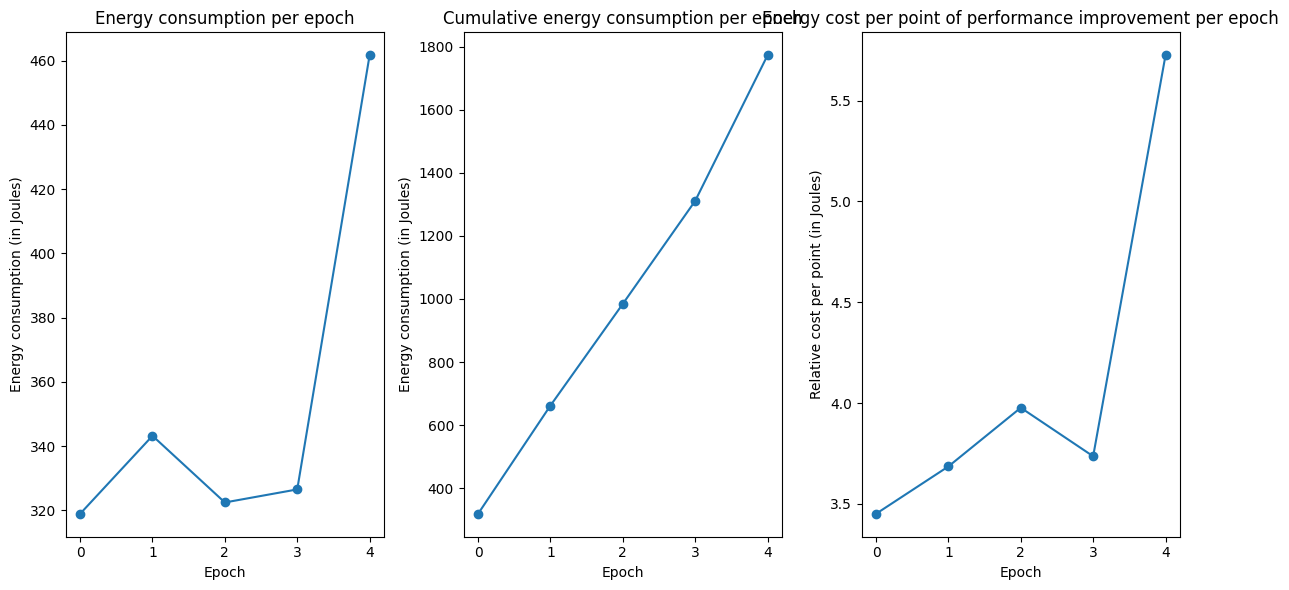

In [8]:
#  !pip install zeus-ml
!anaconda install zeus-ml # !pip install zeus-ml
from zeus.monitor import ZeusMonitor
import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
    # All GPUs are measured simultaneously if `gpu_indices` is not given.
    if torch.cuda.is_available():
        monitor = ZeusMonitor(gpu_indices=[torch.cuda.current_device()])
    else:
        raise Exception("Check your GPU (CUDA) driver in order to run following code")

# RNN Training
# Number of steps to unroll
seq_dim = 28

epochs = []
relative_cost_per_point = []

iter = 0
for epoch in range(num_epochs):
    monitor.begin_window("epoch")
    steps = []
    for i, (images, labels) in enumerate(train_loader):
        monitor.begin_window("step")
        # Load images as Variable
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, seq_dim, input_dim))
            labels = Variable(labels)

        # Clear gradients w.r.t. parameters
        optimizer_rnn.zero_grad()

        # Forward pass to get output/logits
        outputs = model_rnn(images)

        # Calculate Loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer_rnn.step()

        iter += 1
        result = monitor.end_window("step")
        steps.append(result)
        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, seq_dim, input_dim).cuda())
                else:
                    images = Variable(images.view(-1, seq_dim, input_dim))

                # Forward pass only to get logits/output
                outputs = model_rnn(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
    mes = monitor.end_window("epoch")
    epochs.append(mes)
    print(f"Epoch {epoch} consumed {mes.time} s and {mes.total_energy} J.")

    relative_cost_per_point.append(mes.total_energy / (accuracy + 1e-10))

    avg_time = sum(map(lambda m: m.time, steps)) / len(steps)
    avg_energy = sum(map(lambda m: m.total_energy, steps)) / len(steps)
    print(f"One step took {avg_time} s and {avg_energy} J on average.")


############### PLOTS ###############
epoch_energy = [epoch.total_energy for epoch in epochs]

cumulative_energy = np.cumsum([epoch.total_energy for epoch in epochs])

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(range(len(epoch_energy)), epoch_energy, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Energy consumption (in Joules)')
plt.title('Energy consumption per epoch')

plt.subplot(1, 3, 2)
plt.plot(range(len(cumulative_energy)), cumulative_energy, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Energy consumption (in Joules)')
plt.title('Cumulative energy consumption per epoch')

plt.subplot(1, 3, 3)
plt.plot(range(len(relative_cost_per_point)), relative_cost_per_point, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Relative cost per point (in Joules)')
plt.title('Energy cost per point of performance improvement per epoch')

plt.tight_layout()
plt.show()

I ploted three statistics to discover how much energy consums the network during training. Starting from left to right, we see how much energy each epoch consumed in total. Than how much energy the network consumed in total cumulated over time/epoch. And lastly how much improvement we get for our energy or how much energy it costs us per epoch to get a improvement. The trend is obvious, over time/epochs the improvement gets less and the energy needed in order to get a improvement rises. In the beginning the network is learning the basic concepts of the samples, so every samples brings some features to the table which brings the network forward, it converges fast. Later in order to make progress the network needs to see samples several times in order to leran their intricacies for distinction. More over the "simple" samples where already learned by the model but gets shown over again which doesn't bring much progress either. Which overall leads to more afford for the model in order to make progress and makes each sample less affective.

<!-- feinheiten lernen -->

c)ii) Measure also the energy consumption of training the GRU model from task 4, generating the same type of visualization as in c)i). Compare the two models in terms of their training consumption, relating your observations to the models characteristics. (1 points)

[2024-07-16 13:55:00,225] [zeus.monitor.energy](energy.py:150) Monitoring GPU indices [0].
Iteration: 500. Loss: 0.09862599521875381. Accuracy: 95.66000366210938
Epoch 0 consumed 11.148812294006348 s and 339.52899999999863 J.
Iteration: 1000. Loss: 0.06652560830116272. Accuracy: 96.13999938964844
Epoch 1 consumed 11.20223093032837 s and 337.0690000000013 J.
Iteration: 1500. Loss: 0.13080452382564545. Accuracy: 96.7699966430664
Epoch 2 consumed 11.133335590362549 s and 336.7039999999997 J.
Iteration: 2000. Loss: 0.11816011369228363. Accuracy: 95.58000183105469
Epoch 3 consumed 11.218518495559692 s and 340.34900000000016 J.
Iteration: 2500. Loss: 0.07350186258554459. Accuracy: 96.97000122070312
Iteration: 3000. Loss: 0.08252198249101639. Accuracy: 97.27999877929688
Epoch 4 consumed 12.303949117660522 s and 373.1239999999998 J.


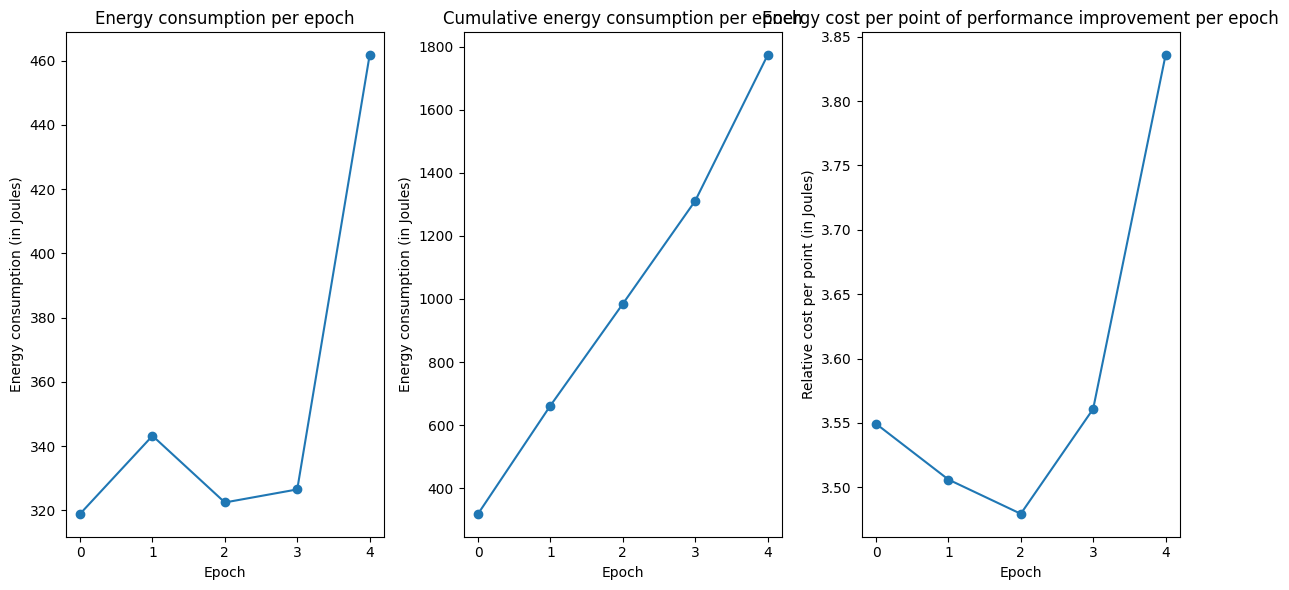

############### RNN + GRU PLOTS ###############



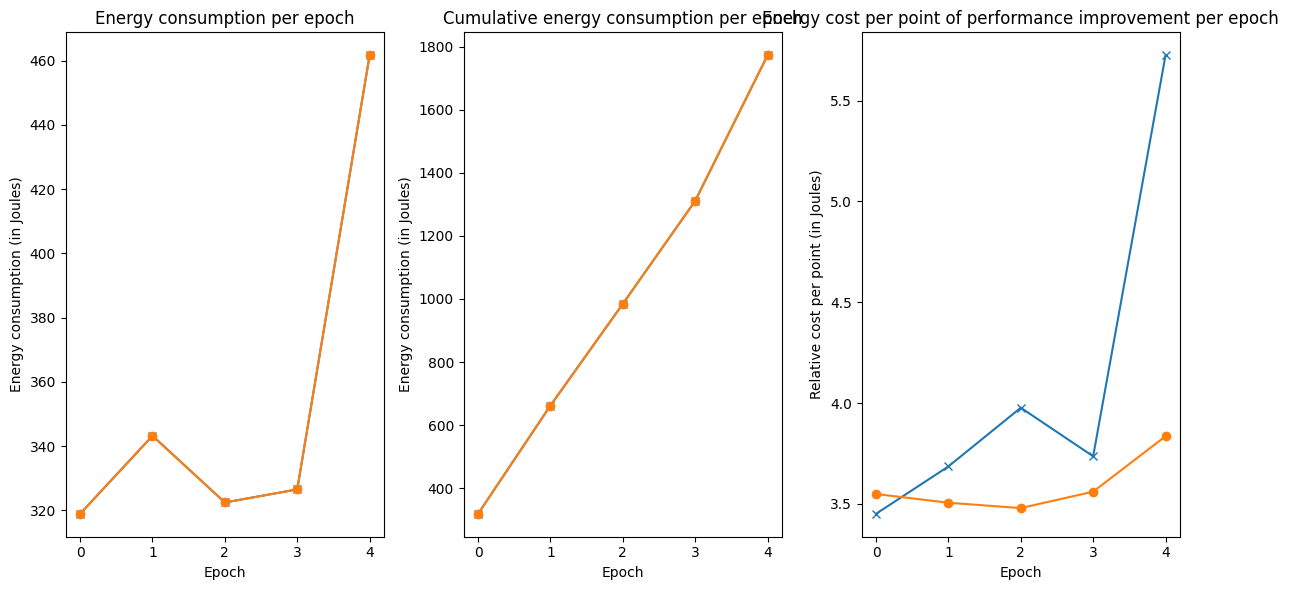

In [14]:
# Implement GRU energy consumption measuring here
# !anaconda install zeus-ml # !pip install zeus-ml
from zeus.monitor import ZeusMonitor
import matplotlib.pyplot as plt
import numpy as np
# GRU Training

if __name__ == "__main__":
    # All GPUs are measured simultaneously if `gpu_indices` is not given.
    if torch.cuda.is_available():
        monitor = ZeusMonitor(gpu_indices=[torch.cuda.current_device()])
    else:
        raise Exception("Check your GPU (CUDA) driver in order to run following code")

# Number of steps to unroll
seq_dim = 28

gru_epochs = []
gru_relative_costs_per_epoch = []

iter = 0
for epoch in range(num_epochs):
    monitor.begin_window("epoch")
    gru_steps = []
    for i, (images, labels) in enumerate(train_loader):
        monitor.begin_window("step")
        # Load images as Variable
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, seq_dim, input_dim))
            labels = Variable(labels)

        # Clear gradients w.r.t. parameters
        optimizer_gru.zero_grad()

        # Forward pass to get output/logits
        outputs = model_gru(images)

        # Calculate Loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer_gru.step()

        iter += 1

        result = monitor.end_window("step")
        gru_steps.append(result)

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, seq_dim, input_dim).cuda())
                else:
                    images = Variable(images.view(-1, seq_dim, input_dim))

                # Forward pass only to get logits/output
                outputs = model_gru(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

    mes = monitor.end_window("epoch")
    gru_epochs.append(mes)
    print(f"Epoch {epoch} consumed {mes.time} s and {mes.total_energy} J.")

    gru_relative_costs_per_epoch.append(mes.total_energy / (accuracy + 1e-10))

    # avg_time = sum(map(lambda m: m.time, steps)) / len(steps)
    # avg_energy = sum(map(lambda m: m.total_energy, steps)) / len(steps)
    # print(f"One step took {avg_time} s and {avg_energy} J on average.")

############### GRU PLOTS ###############
gru_epoch_energy = [epoch.total_energy for epoch in epochs]

gru_cumulative_energy = np.cumsum([epoch.total_energy for epoch in epochs])

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(range(len(gru_epoch_energy)), gru_epoch_energy, marker='o') # GRU
plt.xlabel('Epoch')
plt.ylabel('Energy consumption (in Joules)')
plt.title('Energy consumption per epoch')

plt.subplot(1, 3, 2)
plt.plot(range(len(gru_cumulative_energy)), gru_cumulative_energy, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Energy consumption (in Joules)')
plt.title('Cumulative energy consumption per epoch')

plt.subplot(1, 3, 3)
plt.plot(range(len(gru_relative_costs_per_epoch)), gru_relative_costs_per_epoch, marker='o') # GRU
plt.xlabel('Epoch')
plt.ylabel('Relative cost per point (in Joules)')
plt.title('Energy cost per point of performance improvement per epoch')

plt.tight_layout()
plt.show()

############### RNN + GRU PLOTS ###############
print("############### RNN + GRU PLOTS ###############\n")
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(range(len(epoch_energy)), epoch_energy, marker='x') # RNN
plt.plot(range(len(gru_epoch_energy)), gru_epoch_energy, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Energy consumption (in Joules)')
plt.title('Energy consumption per epoch')

plt.subplot(1, 3, 2)
plt.plot(range(len(cumulative_energy)), cumulative_energy, marker='x') # RNN
plt.plot(range(len(gru_cumulative_energy)), gru_cumulative_energy, marker='o') # GRU
plt.xlabel('Epoch')
plt.ylabel('Energy consumption (in Joules)')
plt.title('Cumulative energy consumption per epoch')

plt.subplot(1, 3, 3)
plt.plot(range(len(relative_cost_per_point)), relative_cost_per_point, marker='x') # RNN
plt.plot(range(len(gru_relative_costs_per_epoch)), gru_relative_costs_per_epoch, marker='o') # GRU
plt.xlabel('Epoch')
plt.ylabel('Relative cost per point (in Joules)')
plt.title('Energy cost per point of performance improvement per epoch')

plt.tight_layout()
plt.show()

Structure of the plots are described in excercise eleven task c)i). For a better comparison I ploted the RNN and GRU graphs in one plot. Orange graphs corresponse to the RNN model and blue to the GRU model. The general energy consumption of both models are kind of similar, that might be the case because we only trained the models for a few epochs, where the GRUs model advantage of keeping the history better. Resulting in a better outcome with less afford. Thats it, now we focus on the energy consumption per improvement. The RNN model consums more energy per improvement especially later on in the training than the GRU model, because the GRU model can remember sequential data better over time using their hidden state which leads to less effort in the learning process. Meanwhile the RNN model forgets things to fast and needs to relearn them which consums more energy/effort to improve.

<!-- - Verbrauch vergleichen
- Beobachtungen/Energyverbrauch auf die Blöcke des NEtzwerkeszurückführen

Offcource both showing the same trend, in the beginning the models learn the basic concepts of the samples and everyone brings new features to the table, so high reward and low cost. -->

d) DEAP (http://www.eecs.qmul.ac.uk/mmv/datasets/deap/doc/tac_special_issue_2011.pdf) is one of the most popular public data sets of physiological data for emotion recognition. Have a look at the data collection process and make a statement about potential biases a model trained on this data could exhibit. Make references to at least three different aspects of the paper (or other sources working with DEAP). What consequences could that have? (2 points)

First of all the data leaks representative participants in terms of numbers, their is only a small amount enforced through the complex recording setup. On top their are not really diverse in age and demographic, "mostly Europan students"[[1]](http://www.eecs.qmul.ac.uk/mmv/datasets/deap/doc/tac_special_issue_2011.pdf). Based on the mentioned bias they decided to increase the bias by "mainly [selecting] European and American artists"[[1]](http://www.eecs.qmul.ac.uk/mmv/datasets/deap/doc/tac_special_issue_2011.pdf), which limits cultural diversity. And 
To wrap it up the model will most likely get a bias during training using the dataset. The bias will appear for people out of their twenties, from different demographic backgrounds or different cultural taste of music other than European or American artists.

[[1]](http://www.eecs.qmul.ac.uk/mmv/datasets/deap/doc/tac_special_issue_2011.pdf) "DEAP: A Database for Emotion Analysis using Physiological Signals" by Sander Koelstra, Student Member, Christian M ¨uhl, Mohammad Soleymani, Student Member, Jong-Seok Lee, Member, Ashkan Yazdani, Touradj Ebrahimi, Member, Thierry Pun, Member, Anton Nijholt, Member, Ioannis Patras, Member, last accessed 16.07.2024

<!-- - Labor beeinflusst nicht natürlich verhalten
- Demographisch eingeschränkt
- 
- Konsequenzen in einer real life application discrimination or less usage of other demographic ages

# TODO 13 Seiten -->

e) Assume you are working on a model which can detect enjoyment or boredom of a person from video recordings for improving content recommendation of a home entertainment platform. Give a short summary of how the AI Act would influence your work. At least mention how your system would be classified by the AI Act and name one aspect of how this will influence the training of the model and one with regards to its deployment with end-users. Provide references to specific parts of the AI act. (2 points)

The AI Act drastically influences every step of the work. The Act wants to regulate AI applications/systems by ranking their risk level. For this project we are working with highly personal and sensitiv data which will lead to a high risk classification of our system (Annex Three, 1 (c)). Now we know our system is treated as a high risk system, so we need to consider the Act laws. Before and during training we actively need to track the data to observe potential biases and build stratagies to solve them (Chapter Three, Section Two, Article 10 2. (g) and (h)). For the deployment we need to consider transparency for the user. We archieve that by providing insides on how the system works and which outcome to expect (Chapter Three, Section Two, Article 13 1. and 3 (b) (i) and (ii)). So we need the design and decision process of the system to be understood by average person without tec background. All in all a lot overhead.

[[1]](https://artificialintelligenceact.eu) AI Act, last accessed 17.07.2024

<!-- working with sensitive data, will most likely be the case


<!-- The AI Act brings a framework for ranking the "risk level" of AI development  -->

<!-- # TODO
https://artificialintelligenceact.eu/de/article/5/
- AI act Einfluss auf Arbeit zusammenfassung
- Klassifizierung meines Systems
- Ein aspekt der Mein Training beeinflusst
- EIn Aspekt den ich beim deployen/User anbieten beeinflusst
- QUELLEN/Zeilen geben -->

### Exercise 11: Dimensionality Reduction
In exercise sheet 5, one of the tasks was to visualize the 2D latent space of a Variational Autoencoder trained on the MNIST digits dataset. It was intentionally limited to 2D to make visualization easier. One of the findings of that analysis was that the size of the latent space might be too small for the VAE to properly separate the different digits. In real life applications one might even use a latent dimension in the hundreds. Therefore, we will now operate in an example more closer to reality, by using a bigger latent space. Once the dimensionality of the latent space is larger than 3 it becomes difficult to visualize. Dimensinality reduction will help us.

In [ ]:
import random
from typing import Tuple, Dict, List
import torchvision.utils as vutils

import numpy as np
import torch
from torch import Tensor
from pathlib import Path
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import sys

RANDOM_SEED = 42

# Set random seeds
random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [ ]:
# Load vae.py - must be placed in the same directory as this notebook.
import sys
sys.path.insert(0, '.')
from vae import VAE, MNISTDecoder, MNISTEncoder

MODEL_PATH = Path("./vae-model-32.pth")
LATENT_DIM = 32

def load_vae(model_path: Path = MODEL_PATH, latent_dim: int  = 32) -> VAE:
    """
    Initializes the variational auto-encoder and loads the state dict saved under model_path.
    """
    if not model_path.exists():
        sys.exit(f"Found no model file under: {model_path.absolute()}.\n"
                 f"Please download the vae_model.pth from StudIP and place it in the directory of this notebook.")
    else:
        print(f"Loading VAE from path: {model_path.absolute()}")
    mnist_encoder = MNISTEncoder(latent_dim=LATENT_DIM)
    mnist_decoder = MNISTDecoder(latent_dim=LATENT_DIM)
    vae = VAE(mnist_encoder, mnist_decoder, latent_dim)
    vae_state_dict = torch.load(model_path, map_location=torch.device('cpu'))
    vae.load_state_dict(vae_state_dict)
    return vae

vae_model = load_vae(MODEL_PATH)
vae_model.eval()
print(vae_model)

Loading VAE from path: c:\Users\Klaus\WorkNAS\Uni\6FSINF_MA\Tutorial\aml_portfolio2024\vae-model-32.pth
VAE(
  (encoder): MNISTEncoder(
    (hidden_layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Linear(in_features=512, out_features=256, bias=True)
      (3): ReLU()
    )
    (out_mu): Linear(in_features=256, out_features=32, bias=True)
    (out_var): Linear(in_features=256, out_features=32, bias=True)
  )
  (decoder): MNISTDecoder(
    (hidden_layers): Sequential(
      (0): Linear(in_features=32, out_features=256, bias=True)
      (1): ReLU()
      (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Linear(in_features=256, out_features=512, bias=True)
      (4): ReLU()
      (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (out_layer): Linear(in_features=512, out_features=784, bias=True)
    (out_act_fn): Tanh()
  )
)


In [ ]:
import utils
import seaborn as sns
import pandas as pd

DATA_PATH = Path(".") / "data"
print("Loading MNIST data...")

_, mnist_dev_set = utils.get_mnist_train_dev_loaders(DATA_PATH, batch_size=64, flatten_img=True)

print("...MNIST data loaded")

Loading MNIST data...
...MNIST data loaded


a) Implement the missing sections from the following code cell. (5 points)

Running Exercise 1.1...


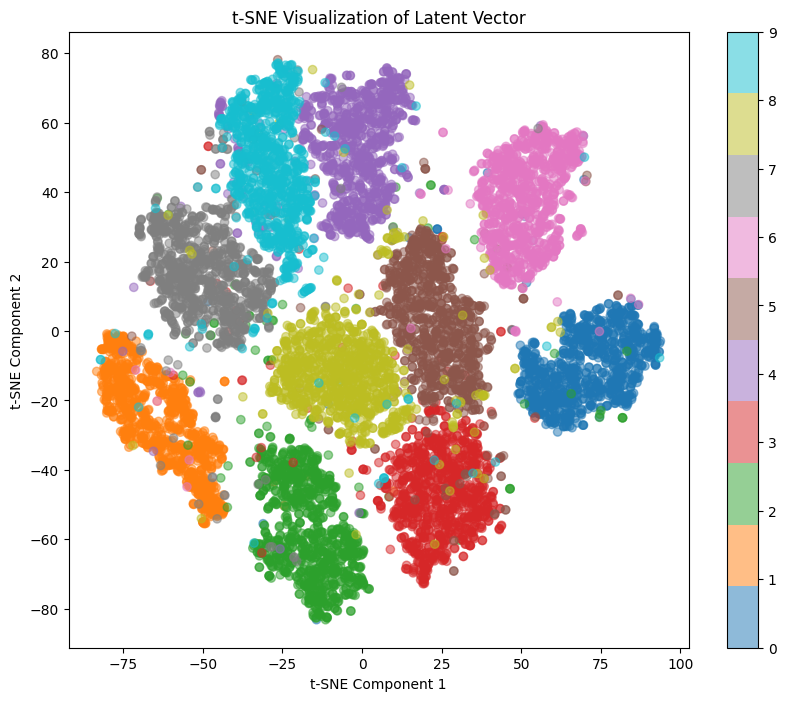

In [ ]:
from sklearn.manifold import TSNE

def plot_latent_vector_scatter_plot(
        vae: VAE,
        mnist_dev_loader: DataLoader,
        num_samples_per_class: int = 1000,
        num_classes: int = 10,
        show: bool = True
) -> Tensor:
    # We create a Dictionary of 1000 samples per MNIST class
    # The Dict has the form: Dict[int, List[Tensor]],
    # where the key is the MNIST digit and the value is a list of flattened MNSIT tensors
    label_to_dev_samples = utils.get_label_to_dev_samples(mnist_dev_loader, num_samples_per_class, num_classes)

    # Use the VAE to encode the MNIST digits to sampled latent vectors
    # The latent vectors are saved in this list
    all_dev_sample_latent_vecs = []
    # Also store the labels in the same order for visualization purposes
    all_labels = []
    # HINT: Feel free to use functions from utils.py and vae.py
    ## YOUR CODE HERE START

    ## YOUR CODE HERE END
    for label in range(num_classes):
        samples = label_to_dev_samples[label]
        for sample in samples:
            sample = sample.view(1, -1)
            latent_vec = vae.encoder(sample)[0].detach().numpy()  # assuming vae.encoder returns (mu, logvar)
            all_dev_sample_latent_vecs.append(latent_vec.flatten())  # Ensure latent_vec is flattened
            all_labels.append(label)

    # Use t-sne to reduce the latent embedding to two dimensions
    ## YOUR CODE HERE START
    all_dev_sample_latent_vecs = np.array(all_dev_sample_latent_vecs)
    tsne = TSNE(n_components=2, random_state=0)
    latent_tsne = tsne.fit_transform(all_dev_sample_latent_vecs)

    ## YOUR CODE HERE END

    ## Create a Scatter plot of the latent vectors
    ## YOUR CODE HERE (START)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(latent_tsne[:, 0], latent_tsne[:, 1], c=all_labels, cmap='tab10', alpha=0.5)
    plt.colorbar(scatter, ticks=range(num_classes))
    plt.title('t-SNE Visualization of Latent Vector')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    if show:
        plt.show()

    ## YOUR CODE HERE END

    return all_dev_sample_latent_vecs

print("Running Exercise 1.1...")
latent_code_dev_samples = plot_latent_vector_scatter_plot(vae_model, mnist_dev_set, show=True)

b) In the following you will have to answer a couple of questions regarding this result and t-SNE. As this was not covered in detail in the lecture, we provide you with the original paper of t-SNE (https://www.researchgate.net/publication/228339739_Viualizing_data_using_t-SNE) as well as a short introduction on how to interpret t-SNE vizualisations (https://distill.pub/2016/misread-tsne/). Note however, that the questions do NOT require mathematical reasoning, but rather build on general characteristics of t-SNE.

i) What does this visualization tell us? (3 points)

__This visualization__ is typically used to represent high-dimensional data in a 2D space, allowing for the identification of patterns, clusters, or similarities in complex datasets. Each point likely represents an individual data sample, and the proximity of points to each other indicates similarity in the original high-dimensional space.

The t-SNE visualization reveals distinct clusters in the latent space, suggesting the data has clear groupings or categories. The spread and overlap of clusters indicate varying degrees of similarity between different groups.

ii) Does this representation tell us something about the similarities of different numbers? If so, give an example. Otherwise, explain why not. (1 point)

__the t-SNE visualization show us__:
* Cluster Formation
* Digit Representation
* Similarities Between Digits
* Variation Within Digits
* Example Interpretation
* Limitations(Dimensionality Reduction,Axis Meaning,Dataset Dependency,Stochastic Nature)

While t-SNE provides insights into the visual or structural similarity of figures in a dataset, it primarily reflects similarities in their representation rather than inherent mathematical properties. This visualization helps to understand how different figures are grouped based on common features in their original high-dimensional representation.

iii) In this example we vizualised the validation data in order to explore how the learned latent vectors look like on data that was not seen during training. Could such a visualization also be beneficial if the training data is used and this is performed before training any model? If so, explain in what way. (1 point)

* Visualizing the training data using t-SNE before training any model can be extremely beneficial. This practice, often referred to as exploratory data analysis (EDA), can provide valuable insights that inform model design, data preprocessing, and overall understanding of the dataset.

* a t-SNE visualization before model training is a powerful tool for understanding your data. It helps you make informed decisions throughout the machine learning pipeline, from preprocessing and feature engineering to model selection and performance evaluation, ultimately leading to more effective and reliable machine learning solutions.

T-SNE visualization on the training data before model development is indeed highly beneficial. It serves as a crucial step in understanding the inherent structure of your data, which can guide numerous decisions throughout the machine learning pipeline - from data preprocessing and feature engineering to model selection and performance expectations. This practice aligns with the principle of "understanding your data before modeling," which is fundamental to developing effective and robust machine learning solutions.